In [1]:
from bs4 import BeautifulSoup
import datetime as dt

import pandas as pd
import numpy as np
import datetime
import requests

In [2]:
cities = [['1', 'Adamantina'], ['2', 'Adolfo'], ['3', 'Aguaí'], ['4', 'Águas da Prata'], ['5', 'Águas de Lindóia'], ['6', 'Águas de Santa Bárbara'], ['7', 'Águas de São Pedro'], ['8', 'Agudos'], ['9', 'Alambari'], ['10', 'Alfredo Marcondes'], ['11', 'Altair'], ['12', 'Altinópolis'], ['13', 'Alto Alegre'], ['14', 'Alumínio'], ['15', 'Álvares Florence'], ['16', 'Álvares Machado'], ['17', 'Álvaro de Carvalho'], ['18', 'Alvinlândia'], ['19', 'Americana'], ['20', 'Américo Brasiliense'], ['21', 'Américo de Campos'], ['22', 'Amparo'], ['23', 'Analândia'], ['24', 'Andradina'], ['25', 'Angatuba'], ['26', 'Anhembi'], ['27', 'Anhumas'], ['28', 'Aparecida'], ['29', "Aparecida d''Oeste"], ['30', 'Apiaí'], ['31', 'Araçariguama'], ['32', 'Araçatuba'], ['33', 'Araçoiaba da Serra'], ['34', 'Aramina'], ['35', 'Arandu'], ['36', 'Arapeí'], ['37', 'Araraquara'], ['38', 'Araras'], ['39', 'Arco-Íris'], ['40', 'Arealva'], ['41', 'Areias'], ['42', 'Areiópolis'], ['43', 'Ariranha'], ['44', 'Artur Nogueira'], ['45', 'Arujá'], ['46', 'Aspásia'], ['47', 'Assis'], ['48', 'Atibaia'], ['49', 'Auriflama'], ['50', 'Avaí'], ['51', 'Avanhandava'], ['52', 'Avaré'], ['53', 'Bady Bassitt'], ['54', 'Balbinos'], ['55', 'Bálsamo'], ['56', 'Bananal'], ['57', 'Barão de Antonina'], ['58', 'Barbosa'], ['59', 'Bariri'], ['60', 'Barra Bonita'], ['61', 'Barra do Chapéu'], ['62', 'Barra do Turvo'], ['63', 'Barretos'], ['64', 'Barrinha'], ['65', 'Barueri'], ['66', 'Bastos'], ['67', 'Batatais'], ['68', 'Bauru'], ['69', 'Bebedouro'], ['70', 'Bento de Abreu'], ['71', 'Bernardino de Campos'], ['72', 'Bertioga'], ['73', 'Bilac'], ['74', 'Birigui'], ['75', 'Biritiba Mirim'], ['76', 'Boa Esperança do Sul'], ['77', 'Bocaina'], ['78', 'Bofete'], ['79', 'Boituva'], ['80', 'Bom Jesus dos Perdões'], ['81', 'Bom Sucesso de Itararé'], ['82', 'Borá'], ['83', 'Boracéia'], ['84', 'Borborema'], ['85', 'Borebi'], ['86', 'Botucatu'], ['87', 'Bragança Paulista'], ['88', 'Braúna'], ['89', 'Brejo Alegre'], ['90', 'Brodowski'], ['91', 'Brotas'], ['92', 'Buri'], ['93', 'Buritama'], ['94', 'Buritizal'], ['95', 'Cabrália Paulista'], ['96', 'Cabreúva'], ['97', 'Caçapava'], ['98', 'Cachoeira Paulista'], ['99', 'Caconde'], ['100', 'Cafelândia'], ['101', 'Caiabu'], ['102', 'Caieiras'], ['103', 'Caiuá'], ['104', 'Cajamar'], ['105', 'Cajati'], ['106', 'Cajobi'], ['107', 'Cajuru'], ['108', 'Campina do Monte Alegre'], ['109', 'Campinas'], ['110', 'Campo Limpo Paulista'], ['111', 'Campos do Jordão'], ['112', 'Campos Novos Paulista'], ['113', 'Cananéia'], ['114', 'Canas'], ['115', 'Cândido Mota'], ['116', 'Cândido Rodrigues'], ['117', 'Canitar'], ['118', 'Capão Bonito'], ['119', 'Capela do Alto'], ['120', 'Capivari'], ['121', 'Caraguatatuba'], ['122', 'Carapicuíba'], ['123', 'Cardoso'], ['124', 'Casa Branca'], ['125', 'Cássia dos Coqueiros'], ['126', 'Castilho'], ['127', 'Catanduva'], ['128', 'Catiguá'], ['129', 'Cedral'], ['130', 'Cerqueira César'], ['131', 'Cerquilho'], ['132', 'Cesário Lange'], ['133', 'Charqueada'], ['134', 'Chavantes'], ['135', 'Clementina'], ['136', 'Colina'], ['137', 'Colômbia'], ['138', 'Conchal'], ['139', 'Conchas'], ['140', 'Cordeirópolis'], ['141', 'Coroados'], ['142', 'Coronel Macedo'], ['143', 'Corumbataí'], ['144', 'Cosmópolis'], ['145', 'Cosmorama'], ['146', 'Cotia'], ['147', 'Cravinhos'], ['148', 'Cristais Paulista'], ['149', 'Cruzália'], ['150', 'Cruzeiro'], ['151', 'Cubatão'], ['152', 'Cunha'], ['153', 'Descalvado'], ['154', 'Diadema'], ['155', 'Dirce Reis'], ['156', 'Divinolândia'], ['157', 'Dobrada'], ['158', 'Dois Córregos'], ['159', 'Dolcinópolis'], ['160', 'Dourado'], ['161', 'Dracena'], ['162', 'Duartina'], ['163', 'Dumont'], ['164', 'Echaporã'], ['165', 'Eldorado'], ['166', 'Elias Fausto'], ['167', 'Elisiário'], ['168', 'Embaúba'], ['169', 'Embu das Artes'], ['170', 'Embu Guaçú'], ['171', 'Emilianópolis'], ['172', 'Engenheiro Coelho'], ['173', 'Espírito Santo do Pinhal'], ['174', 'Espírito Santo do Turvo'], ['175', 'Estiva Gerbi'], ['177', "Estrela d''Oeste"], ['176', 'Estrela do Norte'], ['178', 'Euclides da Cunha Paulista'], ['179', 'Fartura'], ['180', 'Fernando Prestes'], ['181', 'Fernandópolis'], ['182', 'Fernão'], ['183', 'Ferraz de Vasconcelos'], ['184', 'Flora Rica'], ['185', 'Floreal'], ['186', 'Flórida Paulista'], ['187', 'Florínia'], ['188', 'Franca'], ['189', 'Francisco Morato'], ['190', 'Franco da Rocha'], ['191', 'Gabriel Monteiro'], ['192', 'Gália'], ['193', 'Garça'], ['194', 'Gastão Vidigal'], ['195', 'Gavião Peixoto'], ['196', 'General Salgado'], ['197', 'Getulina'], ['198', 'Glicério'], ['199', 'Guaiçara'], ['200', 'Guaimbê'], ['201', 'Guaíra'], ['202', 'Guapiaçu'], ['203', 'Guapiara'], ['204', 'Guará'], ['205', 'Guaraçaí'], ['206', 'Guaraci'], ['207', "Guarani d''Oeste"], ['208', 'Guarantã'], ['209', 'Guararapes'], ['210', 'Guararema'], ['211', 'Guaratinguetá'], ['212', 'Guareí'], ['213', 'Guariba'], ['214', 'Guarujá'], ['215', 'Guarulhos'], ['216', 'Guatapará'], ['217', 'Guzolândia'], ['218', 'Herculândia'], ['219', 'Holambra'], ['220', 'Hortolândia'], ['221', 'Iacanga'], ['222', 'Iacri'], ['223', 'Iaras'], ['224', 'Ibaté'], ['225', 'Ibirá'], ['226', 'Ibirarema'], ['227', 'Ibitinga'], ['228', 'Ibiúna'], ['229', 'Icém'], ['230', 'Iepê'], ['231', 'Igaraçu do Tietê'], ['232', 'Igarapava'], ['233', 'Igaratá'], ['234', 'Iguape'], ['235', 'Ilha Comprida'], ['236', 'Ilha Solteira'], ['237', 'Ilhabela'], ['238', 'Indaiatuba'], ['239', 'Indiana'], ['240', 'Indiaporã'], ['241', 'Inúbia Paulista'], ['242', 'Ipaussu'], ['243', 'Iperó'], ['244', 'Ipeúna'], ['245', 'Ipiguá'], ['246', 'Iporanga'], ['247', 'Ipuã'], ['248', 'Iracemápolis'], ['249', 'Irapuã'], ['250', 'Irapuru'], ['251', 'Itaberá'], ['252', 'Itaí'], ['253', 'Itajobi'], ['254', 'Itaju'], ['255', 'Itanhaém'], ['256', 'Itaóca'], ['257', 'Itapecerica da Serra'], ['258', 'Itapetininga'], ['259', 'Itapeva'], ['260', 'Itapevi'], ['261', 'Itapira'], ['262', 'Itapirapuã Paulista'], ['263', 'Itápolis'], ['264', 'Itaporanga'], ['265', 'Itapuí'], ['266', 'Itapura'], ['267', 'Itaquaquecetuba'], ['268', 'Itararé'], ['269', 'Itariri'], ['270', 'Itatiba'], ['271', 'Itatinga'], ['272', 'Itirapina'], ['273', 'Itirapuã'], ['274', 'Itobi'], ['275', 'Itu'], ['276', 'Itupeva'], ['277', 'Ituverava'], ['278', 'Jaborandi'], ['279', 'Jaboticabal'], ['280', 'Jacareí'], ['281', 'Jaci'], ['282', 'Jacupiranga'], ['283', 'Jaguariúna'], ['284', 'Jales'], ['285', 'Jambeiro'], ['286', 'Jandira'], ['287', 'Jardinópolis'], ['288', 'Jarinu'], ['289', 'Jaú'], ['290', 'Jeriquara'], ['291', 'Joanópolis'], ['292', 'João Ramalho'], ['293', 'José Bonifácio'], ['294', 'Júlio Mesquita'], ['295', 'Jumirim'], ['296', 'Jundiaí'], ['297', 'Junqueirópolis'], ['298', 'Juquiá'], ['299', 'Juquitiba'], ['300', 'Lagoinha'], ['301', 'Laranjal Paulista'], ['302', 'Lavínia'], ['303', 'Lavrinhas'], ['304', 'Leme'], ['305', 'Lençóis Paulista'], ['306', 'Limeira'], ['307', 'Lindóia'], ['308', 'Lins'], ['309', 'Lorena'], ['310', 'Lourdes'], ['311', 'Louveira'], ['312', 'Lucélia'], ['313', 'Lucianópolis'], ['314', 'Luís Antônio'], ['315', 'Luiziânia'], ['316', 'Lupércio'], ['317', 'Lutécia'], ['318', 'Macatuba'], ['319', 'Macaubal'], ['320', 'Macedônia'], ['321', 'Magda'], ['322', 'Mairinque'], ['323', 'Mairiporã'], ['324', 'Manduri'], ['325', 'Marabá Paulista'], ['326', 'Maracaí'], ['327', 'Marapoama'], ['328', 'Mariápolis'], ['329', 'Marília'], ['330', 'Marinópolis'], ['331', 'Martinópolis'], ['332', 'Matão'], ['333', 'Mauá'], ['334', 'Mendonça'], ['335', 'Meridiano'], ['336', 'Mesópolis'], ['337', 'Miguelópolis'], ['338', 'Mineiros do Tietê'], ['339', 'Mira Estrela'], ['340', 'Miracatu'], ['341', 'Mirandópolis'], ['342', 'Mirante do Paranapanema'], ['343', 'Mirassol'], ['344', 'Mirassolândia'], ['345', 'Mococa'], ['346', 'Mogi das Cruzes'], ['347', 'Mogi Guaçu'], ['348', 'Mogi Mirim'], ['349', 'Mombuca'], ['350', 'Monções'], ['351', 'Mongaguá'], ['352', 'Monte Alegre do Sul'], ['353', 'Monte Alto'], ['354', 'Monte Aprazível'], ['355', 'Monte Azul Paulista'], ['356', 'Monte Castelo'], ['357', 'Monte Mor'], ['358', 'Monteiro Lobato'], ['359', 'Morro Agudo'], ['360', 'Morungaba'], ['361', 'Motuca'], ['362', 'Murutinga do Sul'], ['363', 'Nantes'], ['364', 'Narandiba'], ['365', 'Natividade da Serra'], ['366', 'Nazaré Paulista'], ['367', 'Neves Paulista'], ['368', 'Nhandeara'], ['369', 'Nipoã'], ['370', 'Nova Aliança'], ['371', 'Nova Campina'], ['372', 'Nova Canaã Paulista'], ['373', 'Nova Castilho'], ['374', 'Nova Europa'], ['375', 'Nova Granada'], ['376', 'Nova Guataporanga'], ['377', 'Nova Independência'], ['378', 'Nova Luzitânia'], ['379', 'Nova Odessa'], ['380', 'Novais'], ['381', 'Novo Horizonte'], ['382', 'Nuporanga'], ['383', 'Ocauçu'], ['384', 'Óleo'], ['385', 'Olímpia'], ['386', 'Onda Verde'], ['387', 'Oriente'], ['388', 'Orindiúva'], ['389', 'Orlândia'], ['390', 'Osasco'], ['391', 'Oscar Bressane'], ['392', 'Osvaldo Cruz'], ['393', 'Ourinhos'], ['394', 'Ouro Verde'], ['395', 'Ouroeste'], ['396', 'Pacaembu'], ['397', 'Palestina'], ['398', 'Palmares Paulista'], ['399', "Palmeira d''Oeste"], ['400', 'Palmital'], ['401', 'Panorama'], ['402', 'Paraguaçu Paulista'], ['403', 'Paraibuna'], ['404', 'Paraíso'], ['405', 'Paranapanema'], ['406', 'Paranapuã'], ['407', 'Parapuã'], ['408', 'Pardinho'], ['409', 'Pariquera-Açu'], ['410', 'Parisi'], ['411', 'Patrocínio Paulista'], ['412', 'Paulicéia'], ['413', 'Paulínia'], ['414', 'Paulistânia'], ['415', 'Paulo de Faria'], ['416', 'Pederneiras'], ['417', 'Pedra Bela'], ['418', 'Pedranópolis'], ['419', 'Pedregulho'], ['420', 'Pedreira'], ['421', 'Pedrinhas Paulista'], ['422', 'Pedro de Toledo'], ['423', 'Penápolis'], ['424', 'Pereira Barreto'], ['425', 'Pereiras'], ['426', 'Peruíbe'], ['427', 'Piacatu'], ['428', 'Piedade'], ['429', 'Pilar do Sul'], ['430', 'Pindamonhangaba'], ['431', 'Pindorama'], ['432', 'Pinhalzinho'], ['433', 'Piquerobi'], ['434', 'Piquete'], ['435', 'Piracaia'], ['436', 'Piracicaba'], ['437', 'Piraju'], ['438', 'Pirajuí'], ['439', 'Pirangi'], ['440', 'Pirapora do Bom Jesus'], ['441', 'Pirapozinho'], ['442', 'Pirassununga'], ['443', 'Piratininga'], ['444', 'Pitangueiras'], ['445', 'Planalto'], ['446', 'Platina'], ['447', 'Poá'], ['448', 'Poloni'], ['449', 'Pompéia'], ['450', 'Pongaí'], ['451', 'Pontal'], ['452', 'Pontalinda'], ['453', 'Pontes Gestal'], ['454', 'Populina'], ['455', 'Porangaba'], ['456', 'Porto Feliz'], ['457', 'Porto Ferreira'], ['458', 'Potim'], ['459', 'Potirendaba'], ['460', 'Pracinha'], ['461', 'Pradópolis'], ['462', 'Praia Grande'], ['463', 'Pratânia'], ['464', 'Presidente Alves'], ['465', 'Presidente Bernardes'], ['466', 'Presidente Epitácio'], ['467', 'Presidente Prudente'], ['468', 'Presidente Venceslau'], ['469', 'Promissão'], ['470', 'Quadra'], ['471', 'Quatá'], ['472', 'Queiroz'], ['473', 'Queluz'], ['474', 'Quintana'], ['475', 'Rafard'], ['476', 'Rancharia'], ['477', 'Redenção da Serra'], ['478', 'Regente Feijó'], ['479', 'Reginópolis'], ['480', 'Registro'], ['481', 'Restinga'], ['482', 'Ribeira'], ['483', 'Ribeirão Bonito'], ['484', 'Ribeirão Branco'], ['485', 'Ribeirão Corrente'], ['486', 'Ribeirão do Sul'], ['487', 'Ribeirão dos Índios'], ['488', 'Ribeirão Grande'], ['489', 'Ribeirão Pires'], ['490', 'Ribeirão Preto'], ['491', 'Rifaina'], ['492', 'Rincão'], ['493', 'Rinópolis'], ['494', 'Rio Claro'], ['495', 'Rio das Pedras'], ['496', 'Rio Grande da Serra'], ['497', 'Riolândia'], ['498', 'Riversul'], ['499', 'Rosana'], ['500', 'Roseira'], ['501', 'Rubiácea'], ['502', 'Rubinéia'], ['503', 'Sabino'], ['504', 'Sagres'], ['505', 'Sales'], ['506', 'Sales Oliveira'], ['507', 'Salesópolis'], ['508', 'Salmourão'], ['509', 'Saltinho'], ['510', 'Salto'], ['511', 'Salto de Pirapora'], ['512', 'Salto Grande'], ['513', 'Sandovalina'], ['514', 'Santa Adélia'], ['515', 'Santa Albertina'], ['516', "Santa Bárbara d''Oeste"], ['517', 'Santa Branca'], ['518', "Santa Clara d''Oeste"], ['519', 'Santa Cruz da Conceição'], ['520', 'Santa Cruz da Esperança'], ['521', 'Santa Cruz das Palmeiras'], ['522', 'Santa Cruz do Rio Pardo'], ['523', 'Santa Ernestina'], ['524', 'Santa Fé do Sul'], ['525', 'Santa Gertrudes'], ['526', 'Santa Isabel'], ['527', 'Santa Lúcia'], ['528', 'Santa Maria da Serra'], ['529', 'Santa Mercedes'], ['531', "Santa Rita d''Oeste"], ['530', 'Santa Rita do Passa Quatro'], ['532', 'Santa Rosa do Viterbo'], ['533', 'Santa Salete'], ['534', 'Santana da Ponte Pensa'], ['535', 'Santana de Parnaíba'], ['536', 'Santo Anastácio'], ['537', 'Santo André'], ['538', 'Santo Antônio da Alegria'], ['539', 'Santo Antônio de Posse'], ['540', 'Santo Antônio do Aracanguá'], ['541', 'Santo Antônio do Jardim'], ['542', 'Santo Antônio do Pinhal'], ['543', 'Santo Expedito'], ['544', 'Santópolis do Aguapeí'], ['545', 'Santos'], ['546', 'São Bento do Sapucaí'], ['547', 'São Bernardo do Campo'], ['548', 'São Caetano do Sul'], ['549', 'São Carlos'], ['550', 'São Francisco'], ['551', 'São João da Boa Vista'], ['552', 'São João das Duas Pontes'], ['553', 'São João de Iracema'], ['554', "São João do Pau d''Alho"], ['555', 'São Joaquim da Barra'], ['556', 'São José da Bela Vista'], ['557', 'São José do Barreiro'], ['558', 'São José do Rio Pardo'], ['559', 'São José do Rio Preto'], ['560', 'São José dos Campos'], ['561', 'São Lourenço da Serra'], ['562', 'São Luís do Paraitinga'], ['563', 'São Manuel'], ['564', 'São Miguel Arcanjo'], ['565', 'São Paulo'], ['566', 'São Pedro'], ['567', 'São Pedro do Turvo'], ['568', 'São Roque'], ['569', 'São Sebastião'], ['570', 'São Sebastião da Grama'], ['571', 'São Simão'], ['572', 'São Vicente'], ['573', 'Sarapuí'], ['574', 'Sarutaiá'], ['575', 'Sebastianópolis do Sul'], ['576', 'Serra Azul'], ['577', 'Serra Negra'], ['578', 'Serrana'], ['579', 'Sertãozinho'], ['580', 'Sete Barras'], ['581', 'Severínia'], ['582', 'Silveiras'], ['583', 'Socorro'], ['584', 'Sorocaba'], ['585', 'Sud Mennucci'], ['586', 'Sumaré'], ['587', 'Suzanápolis'], ['588', 'Suzano'], ['589', 'Tabapuã'], ['590', 'Tabatinga'], ['591', 'Taboão da Serra'], ['592', 'Taciba'], ['593', 'Taguaí'], ['594', 'Taiaçu'], ['595', 'Taiúva'], ['596', 'Tambaú'], ['597', 'Tanabi'], ['598', 'Tapiraí'], ['599', 'Tapiratiba'], ['600', 'Taquaral'], ['601', 'Taquaritinga'], ['602', 'Taquarituba'], ['603', 'Taquarivaí'], ['604', 'Tarabaí'], ['605', 'Tarumã'], ['606', 'Tatuí'], ['607', 'Taubaté'], ['608', 'Tejupá'], ['609', 'Teodoro Sampaio'], ['610', 'Terra Roxa'], ['611', 'Tietê'], ['612', 'Timburi'], ['613', 'Torre de Pedra'], ['614', 'Torrinha'], ['615', 'Trabiju'], ['616', 'Tremembé'], ['617', 'Três Fronteiras'], ['618', 'Tuiuti'], ['619', 'Tupã'], ['620', 'Tupi Paulista'], ['621', 'Turiúba'], ['622', 'Turmalina'], ['623', 'Ubarana'], ['624', 'Ubatuba'], ['625', 'Ubirajara'], ['626', 'Uchôa'], ['627', 'União Paulista'], ['628', 'Urânia'], ['629', 'Uru'], ['630', 'Urupês'], ['631', 'Valentim Gentil'], ['632', 'Valinhos'], ['633', 'Valparaíso'], ['634', 'Vargem'], ['635', 'Vargem Grande do Sul'], ['636', 'Vargem Grande Paulista'], ['637', 'Várzea Paulista'], ['638', 'Vera Cruz'], ['639', 'Vinhedo'], ['640', 'Viradouro'], ['641', 'Vista Alegre do Alto'], ['642', 'Vitória Brasil'], ['643', 'Votorantim'], ['644', 'Votuporanga'], ['645', 'Zacarias']]

police_stations = [[['1409', '01 DP - Adamantina'], ['1245', '02 DP - Adamantina'], ['1142', '03 DP - Adamantina'], ['895', 'DDM - Adamantina'], ['755', 'DIG - Adamantina'], ['672', 'DISE - Adamantina'], ['1450', 'OUTRAS ESPECIALIZADAS']], [['607', 'DM - Adolfo']], [['606', 'DM - Aguaí']], [['605', 'DM - Águas da Prata']], [['604', 'DM - Águas de Lindóia']], [['602', 'DM - Aguas Santa Barbara']], [['603', 'DM - Águas de S. Pedro']], [['601', 'DM - Agudos']], [['600', 'DM - Alambari']], [['599', 'DM - Alfredo Marcondes']], [['598', 'DM - Altair']], [['597', 'DM - Altinópolis']], [['596', 'DM - Alto Alegre']], [['595', 'DM - Alumínio']], [['610', 'DM - Alvares Florence']], [['593', 'DM - Álvares Machado']], [['594', 'DM - Alv.de Carvalho']], [['592', 'DM - Alvinlândia']], [['1375', '01 DP - Americana'], ['1214', '02 DP - Americana'], ['1123', '03 DP - Americana'], ['1051', '04 DP - Americana'], ['893', 'DDM - Americana'], ['754', 'DIG - Americana'], ['671', 'DISE - Americana'], ['1431', 'OUTRAS ESPECIALIZADAS']], [['591', 'DM - Américo Brasiliense']], [['590', 'DM - Américo de Campos']], [['1408', '01 DP - Amparo'], ['1244', '02 DP - Amparo'], ['589', 'DM - Amparo']], [['588', 'DM - Analândia']], [['1374', '01 DP - Andradina'], ['1213', '02 DP - Andradina'], ['892', 'DDM - Andradina'], ['753', 'DIG - Andradina'], ['670', 'DISE - Andradina'], ['1461', 'OUTRAS ESPECIALIZADAS']], [['587', 'DM - Angatuba']], [['586', 'DM - Anhembi']], [['585', 'DM - Anhumas']], [['584', 'DM - Aparecida']], [['609', 'DM - Aparecida do Oeste']], [['583', 'DM - Apiaí']], [['582', 'DM - Araçariguama']], [['1407', '01 DP - Araçatuba'], ['1243', '02 DP - Araçatuba'], ['1141', '03 DP - Araçatuba'], ['1066', '04 DP - Araçatuba'], ['1540', '1ª DIG'], ['1541', '2ª DISE'], ['1542', '3ª DP Homicídios'], ['891', 'DDM - Araçatuba'], ['752', 'DIG - Araçatuba'], ['703', 'DIJU - Araçatuba'], ['669', 'DISE - Araçatuba'], ['1454', 'OUTRAS ESPECIALIZADAS']], [['581', 'DM - Araçoiba da Serra']], [['580', 'DM - Aramina']], [['579', 'DM - Arandu']], [['578', 'DM - Arapeí']], [['1373', '01 DP - Araraquara'], ['1212', '02 DP - Araraquara'], ['1122', '03 DP - Araraquara'], ['1050', '04 DP - Araraquara'], ['899', 'DDM - Araraquara'], ['751', 'DIG - Araraquara'], ['702', 'DIJU - Araraquara'], ['668', 'DISE - Araraquara'], ['1413', 'OUTRAS ESPECIALIZADAS']], [['1406', '01 DP - Araras'], ['1242', '02 DP - Araras'], ['890', 'DDM - Araras'], ['577', 'DM - Araras']], [['576', 'DM - Arco Íris']], [['575', 'DM - Arealva']], [['574', 'DM - Areias']], [['573', 'DM - Areiópolis']], [['572', 'DM - Ariranha']], [['571', 'DM - Artur Nogueira']], [['52', 'DM Aruja']], [['570', 'DM - Aspásia']], [['1405', '01 DP - Assis'], ['1241', '02 DP - Assis'], ['1140', '03 DP - Assis'], ['1065', '04 DP - Assis'], ['889', 'DDM - Assis'], ['750', 'DIG - Assis'], ['667', 'DISE - Assis'], ['1475', 'OUTRAS ESPECIALIZADAS']], [['1372', '01 DP - Atibaia'], ['1211', '02 DP - Atibaia'], ['1121', '03 DP - Atibaia'], ['569', 'DM - Atibaia']], [['568', 'DM - Auriflama']], [['567', 'DM - Avaí']], [['566', 'DM - Avanhandava']], [['1371', '01 DP - Avaré'], ['1210', '02 DP - Avaré'], ['1120', '03 DP - Avaré'], ['888', 'DDM - Avaré'], ['749', 'DIG - Avaré'], ['666', 'DISE - Avaré'], ['1436', 'OUTRAS ESPECIALIZADAS']], [['564', 'DM - Bady Bassit']], [['563', 'DM - Balbinos']], [['562', 'DM - Balsamo']], [['561', 'DM - Bananal']], [['560', 'DM - Barão Antonina']], [['559', 'DM - Barbosa']], [['558', 'DM - Bariri']], [['557', 'DM - Barra Bonita']], [['556', 'DM - Barra do Chapéu']], [['1370', '01 DP - Barra do Turvo'], ['555', 'DM - Barra do Turvo']], [['1369', '01 DP - Barretos'], ['1209', '02 DP - Barretos'], ['1119', '03 DP - Barretos'], ['887', 'DDM - Barretos'], ['748', 'DIG - Barretos'], ['701', 'DIJU - Barretos'], ['665', 'DISE - Barretos'], ['1460', 'OUTRAS ESPECIALIZADAS']], [['554', 'DM - Barrinha']], [['1295', '01 DP Barueri'], ['1167', '02 DP de Barueri'], ['787', 'DDM de Barueri'], ['51', 'DM Barueri'], ['1471', 'OUTRAS ESPECIALIZADAS']], [['886', 'DDM - Bastos'], ['553', 'DM - Bastos']], [['1404', '01 DP - Batatais'], ['885', 'DDM - Batatais'], ['664', 'DISE - Batatais'], ['552', 'DM - Batatais']], [['1368', '01 DP - Bauru'], ['1208', '02 DP - Bauru'], ['1118', '03 DP - Bauru'], ['1049', '04 DP - Bauru'], ['1543', '1ª DIG'], ['1544', '2ª DISE'], ['1545', '3ª DP Homicídios'], ['884', 'DDM - Bauru'], ['747', 'DIG - Bauru'], ['700', 'DIJU - Bauru'], ['663', 'DISE - Bauru'], ['1422', 'OUTRAS ESPECIALIZADAS']], [['1367', '01 DP - Bebedouro'], ['1207', '02 DP - Bebedouro'], ['1117', '03 DP - Bebedouro'], ['883', 'DDM - Bebedouro'], ['746', 'DIG - Bebedouro'], ['662', 'DISE - Bebedouro'], ['1442', 'OUTRAS ESPECIALIZADAS']], [['551', 'DM - Bento de Abreu']], [['550', 'DM - Bern. De Campos']], [['549', 'DM - Bertioga'], ['1522', 'OUTRAS ESPECIALIZADAS']], [['548', 'DM - Bilac']], [['1366', '01 DP - Birigui'], ['1206', '02 DP - Birigui'], ['882', 'DDM - Birigui'], ['547', 'DM - Birigui']], [['50', 'DM Biritiba Mirim']], [['546', 'DM - Boa Esperança Sul']], [['545', 'DM - Bocaina']], [['544', 'DM - Bofete']], [['543', 'DM - Boituva']], [['542', 'DM - Bom Jesus dos Perdões']], [['565', 'DM - B. Sucesso / Itararé']], [['541', 'DM - Borá']], [['540', 'DM - Boracéia']], [['539', 'DM - Borborema']], [['538', 'DM - Borebi']], [['1365', '01 DP - Botucatu'], ['1205', '02 DP - Botucatu'], ['1115', '03 DP - Botucatu'], ['1048', '04 DP - Botucatu'], ['881', 'DDM - Botucatu'], ['745', 'DIG - Botucatu'], ['661', 'DISE - Botucatu'], ['1447', 'OUTRAS ESPECIALIZADAS']], [['1403', '01 DP - Bragança Pta.'], ['1239', '02 DP - Bragança Pta.'], ['1139', '03 DP - Bragança Pta.'], ['880', 'DDM - Bragança Pta.'], ['744', 'DIG - Bragança Pta.'], ['660', 'DISE - Bragança Pta.'], ['1424', 'OUTRAS ESPECIALIZADAS']], [['537', 'DM - Brauna']], [['536', 'DM - Brejo Alegre']], [['535', 'DM - Brodowski']], [['534', 'DM - Brotas']], [['533', 'DM - Buri']], [['532', 'DM - Buritama']], [['531', 'DM - Buritizal']], [['529', 'DM - Cabrália Paulista']], [['1364', '01 DP - Cabreuva'], ['528', 'DM - Cabreuva']], [['527', 'DM - Caçapava']], [['526', 'DM - Cachoeira Pta.']], [['525', 'DM - Caconde']], [['524', 'DM - Cafelândia']], [['523', 'DM - Caiabu']], [['1248', '01 DP Caieiras'], ['49', 'DM Caieiras']], [['522', 'DM - Caiuá']], [['1294', '01 DP Cajamar'], ['48', 'DM Cajamar']], [['521', 'DM - Cajati']], [['520', 'DM - Cajobi']], [['519', 'DM - Cajuru']], [['518', 'DM - Campina Monte Alegre']], [['1363', '01 DP - Campinas'], ['1204', '02 DP - Campinas'], ['1114', '03 DP - Campinas'], ['1047', '04 DP - Campinas'], ['1005', '05 DP - Campinas'], ['975', '06 DP - Campinas'], ['952', '07 DP - Campinas'], ['932', '08 DP - Campinas'], ['914', '09 DP - Campinas'], ['1274', '10 DP - Campinas'], ['1264', '11 DP - Campinas'], ['1261', '12 DP - Campinas'], ['1258', '13 DP Campinas'], ['1565', '1ª DIG'], ['1489', '2ª DDM Campinas'], ['1546', '2ª DISE'], ['1547', '3ª DP Homicídios'], ['879', 'DDM - Campinas'], ['1483', 'Del. Aeroporto Int. Viracopos - CPS'], ['743', 'DIG - Campinas'], ['698', 'DIJU - Campinas'], ['659', 'DISE - Campinas'], ['1446', 'OUTRAS ESPECIALIZADAS']], [['517', 'DM - Campo Limpo Pta.']], [['1361', '01 DP - Campos do Jordão'], ['516', 'DM - Campos do Jordão']], [['515', 'DM - Campos Novos Pta.']], [['514', 'DM - Cananéia']], [['513', 'DM - Canas']], [['512', 'DM - Cândido Mota']], [['511', 'DM - Cândido Rodrigues']], [['510', 'DM - Canitar']], [['1360', '01 DP - Capão Bonito'], ['878', 'DDM - Capão Bonito'], ['509', 'DM - Capão Bonito']], [['508', 'DM - Capela do Alto']], [['877', 'DDM - Capivari'], ['507', 'DM - Capivari']], [['1402', '01 DP - Caraguatatuba'], ['1238', '02 DP - Caraguatatuba'], ['898', 'DDM - Caraguatatuba'], ['506', 'DM - Caraguatatuba']], [['1293', '01 DP Carapicuiba'], ['1169', '02 DP Carapicuiba'], ['1089', '03 DP Carapicuiba'], ['790', 'DDM Carapicuiba'], ['763', 'Deleg. Idoso Carapicuiba'], ['681', 'DIMA Carapicuiba'], ['620', 'DISE Carapicuiba'], ['1419', 'OUTRAS ESPECIALIZADAS']], [['505', 'DM - Cardoso']], [['876', 'DDM - Casa Branca'], ['742', 'DIG - Casa Branca'], ['658', 'DISE - Casa Branca'], ['504', 'DM - Casa Branca'], ['1458', 'OUTRAS ESPECIALIZADAS']], [['530', 'DM - C. Coqueiros']], [['503', 'DM - Castilho']], [['1358', '01 DP -Catanduva'], ['1202', '02 DP -Catanduva'], ['1138', '03 DP - Catanduva'], ['1063', '04 DP - Catanduva'], ['789', 'DDM -Catanduva'], ['741', 'DIG - Catanduva'], ['657', 'DISE - Catanduva'], ['1444', 'OUTRAS ESPECIALIZADAS']], [['502', 'DM - Catiguá']], [['501', 'DM - Cedral']], [['500', 'DM - Cerqueira César']], [['499', 'DM - Cerquilho']], [['498', 'DM - Cesário Lange']], [['497', 'DM - Charqueada']], [['496', 'DM - Chavantes']], [['495', 'DM - Clementina']], [['494', 'DM - Colina']], [['493', 'DM - Colômbia']], [['492', 'DM - Conchal']], [['491', 'DM - Conchas']], [['490', 'DM - Cordeirópolis']], [['489', 'DM - Coroados']], [['488', 'DM - Coronel Macedo']], [['487', 'DM - Corumbataí']], [['486', 'DM - Cosmópolis']], [['485', 'DM - Cosmorama']], [['1292', '01 DP Cotia'], ['1168', '02 DP Cotia'], ['788', 'DDM Cotia'], ['47', 'DM Cotia']], [['484', 'DM - Cravinhos']], [['483', 'DM - Cristais Pta.']], [['482', 'DM - Cruzália']], [['1356', '01 DP - Cruzeiro'], ['1201', '02 DP - Cruzeiro'], ['1113', '03 DP - Cruzeiro'], ['875', 'DDM - Cruzeiro'], ['740', 'DIG - Cruzeiro'], ['656', 'DISE - Cruzeiro'], ['1418', 'OUTRAS ESPECIALIZADAS']], [['1355', '01 DP - Cubatão'], ['1200', '02 DP - Cubatão'], ['1112', '03 DP - Cubatão'], ['874', 'DDM - Cubatão'], ['481', 'DM - Cubatão']], [['480', 'DM - Cunha']], [['479', 'DM - Descalvado']], [['1291', '01 DP Diadema'], ['1166', '02 DP Diadema'], ['1088', '03 DP Diadema'], ['1035', '04 DP Diadema'], ['786', 'DDM Diadema'], ['762', 'Deleg. Idoso Diadema'], ['680', 'DIMA Diadema'], ['619', 'DISE Diadema'], ['1435', 'OUTRAS ESPECIALIZADAS']], [['478', 'DM - Dirce Reis']], [['477', 'DM - Divinolândia']], [['476', 'DM - Dobrada']], [['475', 'DM - Dois Córregos']], [['474', 'DM - Dolcinópolis']], [['473', 'DM - Dourado']], [['1400', '01 DP - Dracena'], ['1236', '02 DP - Dracena'], ['873', 'DDM - Dracena'], ['739', 'DIG - Dracena'], ['655', 'DISE - Dracena'], ['1464', 'OUTRAS ESPECIALIZADAS']], [['472', 'DM - Duartina']], [['471', 'DM - Dumont']], [['470', 'DM - Echaporã']], [['469', 'DM - Eldorado']], [['468', 'DM - Elias Fausto']], [['467', 'DM - Elisiário']], [['466', 'DM - Embaúba']], [['1290', '01 DP Embú'], ['785', 'DDM Embú'], ['46', 'DM Embú']], [['45', 'DM Embú Guaçú']], [['465', 'DM - Emilianópolis']], [['464', 'DM - Engenheiro Coelho']], [['1354', '01 DP - Espírito Sto. do Pinhal'], ['872', 'DDM - Espírito Sto. do Pinhal'], ['462', 'DM - Espírito Sto. do Pinhal']], [['463', 'DM - Esp. Sto. Do Turvo']], [['461', 'DM - Estiva Gerbi']], [['460', 'DM - Estrela do Norte']], [['608', 'DM - Estrela do Oeste']], [['459', 'DM - Euclides da Cunha Pta.']], [['458', 'DM - Fartura']], [['457', 'DM - Fernando Prestes'], ['1527', 'OUTRAS ESPECIALIZADAS']], [['1399', '01 DP - Fernandópolis'], ['1235', '02 DP - Fernandópolis'], ['871', 'DDM - Fernandópolis'], ['738', 'DIG - Fernandópolis'], ['654', 'DISE - Fernandópolis'], ['1472', 'OUTRAS ESPECIALIZADAS']], [['456', 'DM - Fernão']], [['1477', '001 DP Ferraz de Vasconcelos'], ['44', 'DM Ferraz de Vasconcelos']], [['455', 'DM - Flora Rica']], [['454', 'DM - Floreal']], [['453', 'DM - Florida Pta.']], [['452', 'DM - Florínia']], [['1398', '01 DP - Franca'], ['1234', '02 DP - Franca'], ['1137', '03 DP - Franca'], ['1062', '04 DP - Franca'], ['1013', '05 DP - Franca'], ['870', 'DDM - Franca'], ['737', 'DIG - Franca'], ['696', 'DIJU - Franca'], ['653', 'DISE - Franca'], ['1452', 'OUTRAS ESPECIALIZADAS']], [['784', 'DDM Francisco Morato'], ['43', 'DM Francisco Morato']], [['783', 'DDM Franco Rocha'], ['761', 'Deleg. Idoso Franco Rocha'], ['679', 'DIMA Franco Rocha'], ['618', 'DISE Franco Rocha'], ['42', 'DM Franco da Rocha'], ['1421', 'OUTRAS ESPECIALIZADAS']], [['451', 'DM - Gabriel Monteiro']], [['450', 'DM - Gália']], [['1353', '01 DP - Garça'], ['869', 'DDM - Garça'], ['449', 'DM - Garça']], [['448', 'DM - Gastao Vidigal']], [['447', 'DM - Gaviao Peixoto']], [['446', 'DM - General Salgado']], [['445', 'DM - Getulina']], [['444', 'DM - Glicerio']], [['443', 'DM - Guaiçara']], [['442', 'DM - Guaimbe']], [['1352', '01 DP - Guaíra'], ['868', 'DDM - Guaíra'], ['441', 'DM - Guaíra']], [['440', 'DM - Guapiaçú']], [['439', 'DM - Guapiara']], [['438', 'DM - Guará']], [['437', 'DM - Guaraçai']], [['436', 'DM - Guaraci']], [['435', 'DM - Guarani do Oeste']], [['434', 'DM - Guarantã']], [['433', 'DM - Guararapes']], [['41', 'DM Guararema']], [['1351', '01 DP - Guaratinguetá'], ['1199', '02 DP - Guaratinguetá'], ['1111', '03 DP - Guaratinguetá'], ['867', 'DDM - Guaratinguetá'], ['736', 'DIG - Guaratinguetá'], ['652', 'DISE - Guaratinguetá'], ['1426', 'OUTRAS ESPECIALIZADAS']], [['432', 'DM - Guarei']], [['431', 'DM - Guariba']], [['1350', '01 DP - Guarujá'], ['1198', '02 DP - Guarujá'], ['866', 'DDM - Guarujá'], ['430', 'DM - Guarujá']], [['1289', '01 DP Guarulhos'], ['1164', '02 DP Guarulhos'], ['1087', '03 DP Guarulhos'], ['1034', '04 DP Guarulhos'], ['1000', '05 DP Guarulhos'], ['972', '06 DP Guarulhos'], ['948', '07 DP Guarulhos'], ['929', '08 DP Guarulhos'], ['912', '09 DP Guarulhos'], ['1272', '10 DP Guarulhos'], ['782', 'DDM Guarulhos'], ['1484', 'Del. Aeroporto Int. SP - Guarulhos'], ['760', 'Deleg. Idoso Guarulhos'], ['678', 'DIMA Guarulhos'], ['617', 'DISE Guarulhos'], ['1462', 'OUTRAS ESPECIALIZADAS']], [['429', 'DM - Guatapará']], [['428', 'DM - Guzolandia']], [['427', 'DM - Herculândia']], [['426', 'DM - Holambra']], [['1288', '01 DP Hortolândia'], ['1163', '02 DP Hortolândia'], ['425', 'DM - Hortolândia'], ['1497', 'OUTRAS ESPECIALIZADAS']], [['424', 'DM - Iacanga']], [['423', 'DM - Iacri']], [['422', 'DM - Iaras']], [['421', 'DM - Ibaté']], [['864', 'DDM - Ibirá'], ['420', 'DM - Ibirá'], ['1532', 'OUTRAS ESPECIALIZADAS']], [['419', 'DM - Ibirarema']], [['863', 'DDM - Ibitinga'], ['418', 'DM - Ibitinga']], [['417', 'DM - Ibiúna']], [['416', 'DM - Icém']], [['415', 'DM - Iepe']], [['414', 'DM - Igaraçu do Tietê']], [['413', 'DM - Igarapava']], [['412', 'DM - Igaratá']], [['1397', '01 DP - Iguape'], ['411', 'DM - Iguape']], [['409', 'DM - Ilha Comprida']], [['862', 'DDM - Ilha Solteira'], ['408', 'DM - Ilha Solteira']], [['410', 'DM - Ilhabela']], [['1348', '01 DP - Indaiatuba'], ['861', 'DDM - Indaiatuba'], ['407', 'DM - Indaiatuba']], [['406', 'DM - Indiana']], [['405', 'DM - Indiaporã']], [['404', 'DM - Inúbia Pta.']], [['403', 'DM - Ipaussu']], [['402', 'DM - Iperó']], [['401', 'DM - Ipeúna']], [['400', 'DM - Ipiguá']], [['399', 'DM - Iporanga']], [['398', 'DM - Ipuã']], [['397', 'DM - Iracemápolis']], [['396', 'DM - Irapuã']], [['395', 'DM - Irapuru']], [['394', 'DM - Itaberá']], [['393', 'DM - Itaí']], [['392', 'DM - Itajobi']], [['391', 'DM - Itajú']], [['1396', '01 DP - Itanhaem'], ['1233', '02 DP - Itanhaem'], ['1136', '03 DP - Itanhaem'], ['1572', 'DDM - Itanhaém'], ['735', 'DIG - Itanhaem'], ['651', 'DISE - Itanhaem'], ['1414', 'OUTRAS ESPECIALIZADAS']], [['390', 'DM - Itaoca']], [['1287', '01 DP Itapecerica da Serra'], ['40', 'DM Itapecerica da Serra']], [['1347', '01 DP - Itapetininga'], ['1197', '02 DP - Itapetininga'], ['1109', '03 DP - Itapetininga'], ['1046', '04 DP - Itapetininga'], ['860', 'DDM - Itapetininga'], ['734', 'DIG - Itapetininga'], ['650', 'DISE - Itapetininga'], ['1441', 'OUTRAS ESPECIALIZADAS']], [['1346', '01 DP - Itapeva'], ['1196', '02 DP - Itapeva'], ['1108', '03 DP - Itapeva'], ['1045', '04 DP - Itapeva'], ['859', 'DDM - Itapeva'], ['733', 'DIG - Itapeva'], ['649', 'DISE - Itapeva'], ['1465', 'OUTRAS ESPECIALIZADAS']], [['1485', 'DDM Itapevi'], ['39', 'DM Itapevi']], [['1345', '01 DP - Itapira'], ['1195', '02 DP - Itapira'], ['858', 'DDM - Itapira'], ['389', 'DM - Itapira']], [['388', 'DM - Itapirapuã Pta.']], [['857', 'DDM - Itápolis'], ['387', 'DM - Itápolis']], [['386', 'DM - Itaporanga']], [['385', 'DM - Itapuí']], [['384', 'DM - Itapura']], [['1247', '01 DP Itaquaquecetuba'], ['38', 'DM Itaquaquecetuba']], [['1344', '01 DP - Itararé'], ['383', 'DM - Itararé']], [['382', 'DM - Itariri']], [['1343', '01 DP - Itatiba'], ['1194', '02 DP - Itatiba'], ['856', 'DDM - Itatiba'], ['381', 'DM - Itatiba']], [['380', 'DM - Itatinga']], [['379', 'DM - Itirapina']], [['378', 'DM - Itirapuã']], [['377', 'DM - Itobi']], [['1342', '01 DP - Itú'], ['1193', '02 DP - Itú'], ['1107', '03 DP - Itú'], ['1044', '04 DP - Itú'], ['855', 'DDM - Itú'], ['376', 'DM - Itú'], ['1488', 'OUTRAS ESPECIALIZADAS']], [['375', 'DM - Itupeva']], [['1341', '01 DP - Ituverava'], ['374', 'DM - Ituverava']], [['373', 'DM - Jaborandi'], ['1519', 'OUTRAS ESPECIALIZADAS']], [['1340', '01 DP - Jaboticabal'], ['1192', '02 DP - Jaboticabal'], ['1086', '03 DP Jaboticabal'], ['854', 'DDM - Jaboticabal'], ['372', 'DM - Jaboticabal']], [['1339', '01 DP - Jacareí'], ['1191', '02 DP - Jacareí'], ['1106', '03 DP - Jacareí'], ['1043', '04 DP - Jacareí'], ['1004', '05 DP - Jacareí'], ['853', 'DDM - Jacareí'], ['732', 'DIG - Jacareí'], ['648', 'DISE - Jacareí'], ['1433', 'OUTRAS ESPECIALIZADAS']], [['371', 'DM - Jaci']], [['1395', '01 DP - Jacupiranga'], ['1232', '02 DP - Jacupiranga'], ['647', 'DISE - Jacupiranga'], ['1415', 'OUTRAS ESPECIALIZADAS']], [['370', 'DM - Jaguariúna'], ['1516', 'OUTRAS ESPECIALIZADAS']], [['1394', '01 DP - Jales'], ['1231', '02 DP - Jales'], ['851', 'DDM - Jales'], ['730', 'DIG - Jales'], ['646', 'DISE - Jales'], ['1474', 'OUTRAS ESPECIALIZADAS']], [['369', 'DM - Jambeiro']], [['1286', '01 DP Jandira'], ['37', 'DM Jandira']], [['368', 'DM - Jardinópolis']], [['367', 'DM - Jarinú']], [['1338', '01 DP - Jaú'], ['1190', '02 DP - Jaú'], ['1105', '03 DP - Jaú'], ['1042', '04 DP - Jaú'], ['850', 'DDM - Jaú'], ['729', 'DIG - Jaú'], ['645', 'DISE - Jaú'], ['1448', 'OUTRAS ESPECIALIZADAS']], [['366', 'DM - Jeriguara']], [['365', 'DM - Joanópolis']], [['364', 'DM - João Ramalho']], [['849', 'DDM - José Bonifácio'], ['363', 'DM - José Bonifácio']], [['362', 'DM - Julio Mesquita']], [['361', 'DM - Jumirim']], [['1393', '01 DP - Jundiai'], ['1230', '02 DP - Jundiai'], ['1135', '03 DP - Jundiai'], ['1061', '04 DP - Jundiai'], ['1012', '05 DP - Jundiai'], ['981', '06 DP - Jundiai'], ['956', '07 DP - Jundiai'], ['848', 'DDM - Jundiai'], ['728', 'DIG - Jundiai'], ['644', 'DISE - Jundiai'], ['1457', 'OUTRAS ESPECIALIZADAS']], [['360', 'DM - Junqueirópolis']], [['359', 'DM - Juquiá']], [['36', 'DM Juquitiba']], [['358', 'DM - Lagoinha']], [['357', 'DM - Laranjal Pta.'], ['1511', 'OUTRAS ESPECIALIZADAS']], [['356', 'DM - Lavinia']], [['355', 'DM - Lavrinhas']], [['1337', '01 DP - Leme'], ['1189', '02 DP - Leme'], ['847', 'DDM - Leme'], ['354', 'DM - Leme']], [['353', 'DM - Lençóis Paulista']], [['1392', '01 DP - Limeira'], ['1229', '02 DP - Limeira'], ['1134', '03 DP - Limeira'], ['1060', '04 DP - Limeira'], ['846', 'DDM - Limeira'], ['727', 'DIG - Limeira'], ['643', 'DISE - Limeira'], ['1459', 'OUTRAS ESPECIALIZADAS']], [['352', 'DM - Lindóia']], [['1335', '01 DP - Lins'], ['1188', '02 DP - Lins'], ['1104', '03 DP - Lins'], ['845', 'DDM - Lins'], ['726', 'DIG - Lins'], ['642', 'DISE - Lins'], ['1463', 'OUTRAS ESPECIALIZADAS']], [['1334', '01 DP - Lorena'], ['1187', '02 DP - Lorena'], ['844', 'DDM - Lorena'], ['351', 'DM - Lorena']], [['350', 'DM - Lourdes']], [['349', 'DM - Louveira']], [['348', 'DM - Lucélia']], [['347', 'DM - Lucianópolis']], [['346', 'DM - Luiz Antonio']], [['345', 'DM - Luiziania']], [['344', 'DM - Lupércio']], [['343', 'DM - Lutécia']], [['342', 'DM - Macatuba']], [['341', 'DM - Macaubal']], [['340', 'DM - Macedonia']], [['339', 'DM - Magda']], [['338', 'DM - Mairinque']], [['1285', '01 DP Mairiporã'], ['35', 'DM Mairiporã'], ['1536', 'OUTRAS ESPECIALIZADAS']], [['337', 'DM - Manduri']], [['336', 'DM - Marabá Pta.']], [['335', 'DM - Maracaí']], [['334', 'DM - Marapoama']], [['333', 'DM - Mariápolis']], [['1391', '01 DP - Marília'], ['1228', '02 DP - Marília'], ['1133', '03 DP - Marília'], ['1059', '04 DP - Marília'], ['1011', '05 DP - Marília'], ['843', 'DDM - Marília'], ['725', 'DIG - Marília'], ['694', 'DIJU - Marília'], ['641', 'DISE - Marília'], ['1412', 'OUTRAS ESPECIALIZADAS']], [['332', 'DM - Marinópolis']], [['331', 'DM - Martinópolis']], [['1332', '01 DP - Matao'], ['842', 'DDM - Matão'], ['330', 'DM - Matão']], [['1284', '01 DP Mauá'], ['1162', '02 DP Mauá'], ['1085', '03 DP Mauá'], ['1033', '04 DP Mauá'], ['781', 'DDM Mauá'], ['34', 'DM Mauá']], [['329', 'DM - Mendonça']], [['328', 'DM - Meridiano']], [['327', 'DM - Mesópolis']], [['326', 'DM - Miguelópolis']], [['325', 'DM - Mineiros do Tietê'], ['1515', 'OUTRAS ESPECIALIZADAS']], [['323', 'DM - Mira Estrela']], [['322', 'DM - Miracatú']], [['321', 'DM - Mirandópolis']], [['324', 'DM - Mir. Paranapanema']], [['1331', '01 DP - Mirassol'], ['841', 'DDM - Mirassol'], ['320', 'DM - Mirassol']], [['319', 'DM - Mirassolândia']], [['1390', '01 DP - Mococa'], ['318', 'DM - Mococa']], [['1283', '01 DP Mogi das Cruzes'], ['1161', '02 DP Mogi das Cruzes'], ['1084', '03 DP Mogi das Cruzes'], ['1032', '04 DP Mogi das Cruzes'], ['780', 'DDM Mogi Cruzes'], ['769', 'Del. Idoso Mogi das Cruzes'], ['677', 'DIMA Mogi Cruzes'], ['616', 'DISE Mogi Cruzes'], ['1420', 'OUTRAS ESPECIALIZADAS']], [['1329', '01 DP - Mogi-Guaçu'], ['1185', '02 DP - Mogi-Guaçu'], ['1102', '03 DP - Mogi-Guaçu'], ['839', 'DDM - Mogi-Guaçu'], ['724', 'DIG - Mogi-Guaçu'], ['640', 'DISE - Mogi-Guaçu'], ['1449', 'OUTRAS ESPECIALIZADAS']], [['1330', '01 DP - Mogi Mirim'], ['1186', '02 DP - Mogi Mirim'], ['1103', '03 DP - Mogi Mirim'], ['840', 'DDM - Mogi Mirim'], ['317', 'DM - Mogi Mirim']], [['316', 'DM - Mombuca']], [['315', 'DM - Monções']], [['1389', '01 DP - Mongaguá'], ['1227', '02 DP - Mongaguá'], ['897', 'DDM - Mongaguá'], ['314', 'DM - Mongaguá']], [['313', 'DM - Monte Alegre do Sul']], [['838', 'DDM - Monte Alto'], ['312', 'DM - Monte Alto']], [['837', 'DDM - Monte Aprazível'], ['311', 'DM - Monte Aprazível']], [['310', 'DM - Monte Azul Paulista']], [['309', 'DM - Monte Castelo']], [['308', 'DM - Monte Mor']], [['307', 'DM - Monteiro Lobato']], [['306', 'DM - Morro Agudo']], [['305', 'DM - Morungaba'], ['1537', 'OUTRAS ESPECIALIZADAS']], [['304', 'DM - Motuca']], [['303', 'DM - Muritinga do Sul']], [['302', 'DM - Nantes']], [['301', 'DM - Narandiba']], [['300', 'DM - Natividade da Serrra']], [['299', 'DM - Nazaré Pta.']], [['298', 'DM - Neves Pta.']], [['297', 'DM - Nhandeara']], [['296', 'DM - Nipoã']], [['295', 'DM - Nova Aliança']], [['294', 'DM - Nova Campina']], [['293', 'DM - Nova Canaã Pta.']], [['292', 'DM - Nova Castilho']], [['291', 'DM - Nova Europa']], [['290', 'DM - Nova Granada']], [['289', 'DM - Nova Guataporanga']], [['288', 'DM - Nova Independência']], [['287', 'DM - Nova Luzitania']], [['286', 'DM - Nova Odessa'], ['1517', 'OUTRAS ESPECIALIZADAS']], [['285', 'DM - Novais']], [['723', 'DIG - Novo Horizonte'], ['639', 'DISE - Novo Horizonte'], ['284', 'DM - Novo Horizonte'], ['1466', 'OUTRAS ESPECIALIZADAS']], [['283', 'DM - Nuporanga']], [['282', 'DM - Ocauçú']], [['281', 'DM - Oleo']], [['1328', '01 DP - Olímpia'], ['836', 'DDM - Olímpia'], ['280', 'DM - Olímpia'], ['1500', 'OUTRAS ESPECIALIZADAS']], [['279', 'DM - Onda Verde']], [['278', 'DM - Oriente']], [['277', 'DM - Orindiúva']], [['276', 'DM - Orlândia']], [['1282', '01 DP Osasco'], ['1160', '02 DP Osasco'], ['1083', '03 DP Osasco'], ['1031', '04 DP Osasco'], ['998', '05 DP Osasco'], ['971', '06 DP Osasco'], ['947', '07 DP Osasco'], ['928', '08 DP Osasco'], ['911', '09 DP Osasco'], ['1271', '10 DP Osasco'], ['835', 'DDM Osasco'], ['759', 'Delegacia do Idoso'], ['676', 'DIMA Osasco'], ['615', 'DISE Osasco'], ['33', 'DM Osasco'], ['1423', 'OUTRAS ESPECIALIZADAS']], [['275', 'DM - Oscar Bressane']], [['1327', '01 DP - Osvaldo Cruz'], ['834', 'DDM - Osvaldo Cruz'], ['274', 'DM - Osvaldo Cruz']], [['1388', '01 DP - Ourinhos'], ['1226', '02 DP - Ourinhos'], ['1132', '03 DP - Ourinhos'], ['833', 'DDM - Ourinhos'], ['722', 'DIG - Ourinhos'], ['638', 'DISE - Ourinhos'], ['1455', 'OUTRAS ESPECIALIZADAS']], [['273', 'DM - Ouro Verde']], [['272', 'DM - Ouroeste']], [['271', 'DM - Pacaembú']], [['270', 'DM - Palestina']], [['269', 'DM - Palmares Pta.']], [['268', 'DM - Palmeira do Oeste']], [['267', 'DM - Palmital']], [['266', 'DM - Panorama']], [['1250', '01 DP Paraguaçú Pta.'], ['832', 'DDM - Paraguaçú Pta.'], ['265', 'DM - Paraguaçú Pta.']], [['264', 'DM - Paraibuna']], [['263', 'DM - Paraiso']], [['262', 'DM - Paranapanema']], [['261', 'DM - Paranapuã']], [['260', 'DM - Parapuã']], [['259', 'DM - Pardinho']], [['258', 'DM - Pariquera-Açú'], ['1510', 'OUTRAS ESPECIALIZADAS']], [['257', 'DM - Parisi']], [['256', 'DM - Patrocínio Pta.']], [['255', 'DM - Paulicéia']], [['254', 'DM - Paulínea'], ['1513', 'OUTRAS ESPECIALIZADAS']], [['253', 'DM - Paulistânia']], [['252', 'DM - Paulo de Faria']], [['251', 'DM - Pederneiras']], [['250', 'DM - Pedra Bela']], [['249', 'DM - Pedranópolis']], [['248', 'DM - Pedregulho']], [['247', 'DM - Pedreiras']], [['246', 'DM - Pedrinhas Pta.']], [['245', 'DM - Pedro de Toledo']], [['1325', '01 DP - Penapolis'], ['831', 'DDM - Penapolis'], ['244', 'DM - Penapolis']], [['830', 'DDM - Pereira Barreto'], ['243', 'DM - Pereira Barreto']], [['242', 'DM - Pereiras']], [['1324', '01 DP - Peruíbe'], ['829', 'DDM - Peruíbe'], ['241', 'DM - Peruíbe'], ['1523', 'OUTRAS ESPECIALIZADAS']], [['240', 'DM - Piacatu']], [['239', 'DM - Piedade']], [['238', 'DM - Pilar do Sul']], [['1322', '01 DP - Pindamonhangaba'], ['1184', '02 DP - Pindamonhangaba'], ['1101', '03 DP - Pindamonhangaba'], ['828', 'DDM - Pindamonhangaba'], ['237', 'DM - Pindamonhangaba']], [['236', 'DM - Pindorama']], [['235', 'DM - Pinhalzinho']], [['234', 'DM - Piquerobi']], [['233', 'DM - Piquete']], [['232', 'DM - Piracaia']], [['1387', '01 DP - Piracicaba'], ['1225', '02 DP - Piracicaba'], ['1131', '03 DP - Piracicaba'], ['1058', '04 DP - Piracicaba'], ['1010', '05 DP - Piracicaba'], ['980', '06 DP - Piracicaba'], ['955', '07 DP - Piracicaba'], ['1548', '1ª DIG'], ['1549', '2ª DISE'], ['1566', '3ª DP Homicídios'], ['827', 'DDM - Piracicaba'], ['721', 'DIG - Piracicaba'], ['637', 'DISE - Piracicaba'], ['1467', 'OUTRAS ESPECIALIZADAS']], [['1321', '01 DP - Pirajú'], ['231', 'DM - Pirajú']], [['230', 'DM - Pirajui']], [['229', 'DM - Pirangi']], [['32', 'DM Pirapora do Bom Jesus']], [['228', 'DM - Pirapozinho']], [['1320', '01 DP - Pirassununga'], ['1183', '02 DP - Pirassununga'], ['1100', '03 DP - Pirassununga'], ['826', 'DDM - Pirassununga'], ['227', 'DM - Pirassununga']], [['226', 'DM - Piratininga']], [['225', 'DM - Pitangueiras']], [['224', 'DM - Planalto']], [['223', 'DM - Platina']], [['31', 'DM Poá']], [['222', 'DM - Poloni']], [['221', 'DM - Pompéia']], [['220', 'DM - Pongaí']], [['219', 'DM - Pontal']], [['218', 'DM - Pontalinda']], [['217', 'DM - Pontes Gestal']], [['216', 'DM - Populina']], [['215', 'DM - Porangaba']], [['214', 'DM - Porto Feliz']], [['1318', '01 DP - Porto Ferreira'], ['213', 'DM - Porto Ferreira']], [['212', 'DM - Potim']], [['211', 'DM - Potirendaba']], [['210', 'DM - Pracinha']], [['209', 'DM - Pradópolis']], [['1317', '01 DP - Praia Grande'], ['1182', '02 DP - Praia Grande'], ['1099', '03 DP - Praia Grande'], ['825', 'DDM - Praia Grande'], ['208', 'DM - Praia Grande']], [['207', 'DM - Pratânia']], [['205', 'DM - Presidente Alves']], [['206', 'DM - Pres. Bernardes']], [['1316', '01 DP - Presidente Epitácio'], ['824', 'DDM - Presidente Epitácio'], ['204', 'DM - Presidente Epitácio']], [['1386', '01 DP - Presidente Prudente'], ['1224', '02 DP - Presidente Prudente'], ['1130', '03 DP - Presidente Prudente'], ['1057', '04 DP - Presidente Prudente'], ['1009', '05 DP - Presidente Prudente'], ['979', '06 DP - Presidente Prudente'], ['1550', '1ª DIG'], ['1551', '2ª DISE'], ['1552', '3ª DP Homicídios'], ['823', 'DDM - Presidente Prudente'], ['757', 'DELPOL DE proteção ao idoso'], ['720', 'DIG - Presidente Prudente'], ['692', 'DIJU - Presidente Prudente'], ['636', 'DISE - Presidente Prudente'], ['1473', 'OUTRAS ESPECIALIZADAS']], [['1385', '01 DP - Presidente Venceslau'], ['1223', '02 DP - Presidente Venceslau'], ['822', 'DDM - Presidente Venceslau'], ['719', 'DIG - Presidente Venceslau'], ['635', 'DISE - Presidente Venceslau'], ['1451', 'OUTRAS ESPECIALIZADAS']], [['203', 'DM - Promissão']], [['202', 'DM - Quadra']], [['201', 'DM - Quatá']], [['200', 'DM - Queiroz']], [['199', 'DM - Queluz']], [['198', 'DM - Quintana']], [['197', 'DM - Rafard']], [['779', 'DDM Rancharia'], ['196', 'DM - Rancharia']], [['195', 'DM - Redenção da Serra']], [['194', 'DM - Regente Feijó']], [['193', 'DM - Reginópolis']], [['1384', '01 DP - Registro'], ['1222', '02 DP - Registro'], ['821', 'DDM - Registro'], ['718', 'DIG - Registro'], ['634', 'DISE - Registro'], ['1417', 'OUTRAS ESPECIALIZADAS']], [['192', 'DM - Restinga']], [['189', 'DM - Ribeira'], ['1529', 'OUTRAS ESPECIALIZADAS']], [['188', 'DM - Ribeirão Bonito']], [['191', 'DM - Rib. Branco']], [['187', 'DM - Ribeirão Corrente']], [['186', 'DM - Ribeirão do Sul']], [['185', 'DM - Ribeirão dos Indios']], [['190', 'DM - Rib. Grande']], [['1281', '01 DP Ribeirão Pires'], ['30', 'DM Ribeirão Pires'], ['1491', 'OUTRAS ESPECIALIZADAS']], [['1383', '01 DP - Ribeirão Preto'], ['1221', '02 DP - Ribeirão Preto'], ['1129', '03 DP - Ribeirão Preto'], ['1056', '04 DP - Ribeirão Preto'], ['1008', '05 DP - Ribeirão Preto'], ['978', '06 DP - Ribeirão Preto'], ['954', '07 DP - Ribeirão Preto'], ['933', '08 DP - Ribeirão Preto'], ['1553', '1ª DIG'], ['1554', '2ª DISE'], ['1555', '3ª DP Homicídios'], ['820', 'DDM - Ribeirão Preto'], ['768', 'Del. Idoso Ribeirão Preto'], ['717', 'DIG - Ribeirão Preto'], ['691', 'DIJU - Ribeirão Preto'], ['633', 'DISE - Ribeirão Preto'], ['1440', 'OUTRAS ESPECIALIZADAS']], [['184', 'DM - Rifaina']], [['183', 'DM - Rincão']], [['182', 'DM - Rinópolis']], [['1382', '01 DP - Rio Claro'], ['1220', '02 DP - Rio Claro'], ['1128', '03 DP - Rio Claro'], ['819', 'DDM - Rio Claro'], ['716', 'DIG - Rio Claro'], ['632', 'DISE - Rio Claro'], ['1425', 'OUTRAS ESPECIALIZADAS']], [['181', 'DM - Rio das Pedras']], [['29', 'DM Rio Grande da Serra'], ['1494', 'OUTRAS ESPECIALIZADAS']], [['180', 'DM - Riolândia']], [['179', 'DM - Riversul']], [['1315', '01 DP - Rosana'], ['178', 'DM - Rosana']], [['177', 'DM - Roseira'], ['1534', 'OUTRAS ESPECIALIZADAS']], [['176', 'DM - Rubiacea']], [['175', 'DM - Rubinéia']], [['173', 'DM - Sabino']], [['172', 'DM - Sagres']], [['171', 'DM - Sales']], [['170', 'DM - Sales Oliveira'], ['1501', 'OUTRAS ESPECIALIZADAS']], [['169', 'DM - Salesópolis'], ['1531', 'OUTRAS ESPECIALIZADAS']], [['168', 'DM - Salmourão']], [['167', 'DM - Saltinho']], [['1314', '01 DP - Salto'], ['1181', '02 DP - Salto'], ['818', 'DDM - Salto'], ['166', 'DM - Salto']], [['165', 'DM - Salto de Pirapora']], [['164', 'DM - Salto Grande']], [['163', 'DM - Sandovalina']], [['125', 'DM - Sta. Adélia']], [['162', 'DM - Santa Albertina']], [['1307', '01 DP - Sta. Barbara do Oeste'], ['1174', '02 DP - Sta. Barbara do Oeste'], ['1093', '03 DP - Sta. Barbara do Oeste'], ['804', 'DDM - Sta. Barbara do Oeste'], ['124', 'DM - Sta. Barbara do Oeste']], [['161', 'DM - Santa Branca'], ['1495', 'OUTRAS ESPECIALIZADAS']], [['123', 'DM - Sta. Clara do Oeste']], [['122', 'DM - Sta. Cruz Conceição']], [['127', 'DM - Sta Cruz da Esperança']], [['121', 'DM - Sta. Cruz das Palmeiras']], [['1306', '01 DP - Sta. Cruz do Rio Pardo'], ['803', 'DDM - Sta. Cruz do Rio Pardo'], ['120', 'DM - Sta. Cruz do Rio Pardo']], [['160', 'DM - Santa Ernestina']], [['1305', '01 DP - Sta. Fé do Sul'], ['802', 'DDM - Sta. Fé do Sul'], ['119', 'DM - Sta. Fé do Sul']], [['118', 'DM - Sta. Gertrudes']], [['159', 'DM - Santa Isabel'], ['1506', 'OUTRAS ESPECIALIZADAS']], [['158', 'DM - Santa Lúcia']], [['117', 'DM - Sta. Maria da Serra'], ['1538', 'OUTRAS ESPECIALIZADAS']], [['116', 'DM - Sta. Mercedes']], [['126', 'DM - Sta R. do Passa 4'], ['1499', 'OUTRAS ESPECIALIZADAS']], [['115', 'DM - Sta. Rita do Oeste']], [['114', 'DM - Sta. Rosa Viterbo']], [['157', 'DM - Santa Salete']], [['156', 'DM - Santana da Pte. Pensa']], [['1479', 'DDM Santana de Parnaíba'], ['27', 'DM Santana do Parnaiba'], ['1496', 'OUTRAS ESPECIALIZADAS']], [['113', 'DM - Sto. Anastácio']], [['1279', '01 DP Santo André'], ['1158', '02 DP Santo André'], ['1081', '03 DP Santo André'], ['1030', '04 DP Santo André'], ['997', '05 DP Santo André'], ['970', '06 DP Santo André'], ['777', 'DDM Santo André'], ['767', 'Del. Idoso Santo André'], ['675', 'DIMA Santo André'], ['614', 'DISE Santo André'], ['1430', 'OUTRAS ESPECIALIZADAS']], [['112', 'DM - Sto. Antonio da Alegria'], ['1502', 'OUTRAS ESPECIALIZADAS']], [['111', 'DM - Sto. Antônio de Posse']], [['155', 'DM - Santo Ant. Aracangua']], [['110', 'DM - Sto. Antonio do Jardim'], ['1518', 'OUTRAS ESPECIALIZADAS']], [['109', 'DM - Sto. Antonio do Pinhal']], [['108', 'DM - Sto. Expedito']], [['154', 'DM - Santop. Aguapeí']], [['1381', '01 DP - Santos'], ['1219', '02 DP - Santos'], ['1127', '03 DP - Santos'], ['1054', '04 DP - Santos'], ['1007', '05 DP - Santos'], ['977', '06 DP - Santos'], ['951', '07 DP - Santos'], ['1556', '1ª DIG'], ['1557', '2ª DISE'], ['1558', '3ª DP Homicídios'], ['817', 'DDM - Santos'], ['12', 'Delegacia de Proteção ao Idoso'], ['1482', 'Delegacia Porto de Santos'], ['715', 'DIG - Santos'], ['690', 'DIJU - Santos'], ['631', 'DISE - Santos'], ['1416', 'OUTRAS ESPECIALIZADAS']], [['153', 'DM - São Bento do Sapucaí']], [['1278', '01 DP São Bernardo do Campo'], ['1157', '02 DP São Bernardo do Campo'], ['1080', '03 DP São Bernardo do Campo'], ['1029', '04 DP São Bernardo do Campo'], ['996', '05 DP São Bernardo do Campo'], ['969', '06 DP São Bernardo do Campo'], ['946', '07 DP São Bernardo do Campo'], ['927', '08 DP São Bernardo do Campo'], ['776', 'DDM São Bernardo Campo'], ['766', 'Del. Idoso São Bernardo Campo'], ['674', 'DIMA São Bernardo Campo'], ['613', 'DISE São Bernardo Campo'], ['1439', 'OUTRAS ESPECIALIZADAS']], [['1280', '01 DP S. Caetano do Sul'], ['1159', '02 DP S. Caetano do Sul'], ['1571', 'DDM S. Caetano do Sul'], ['28', 'DM S. Caetano do Sul']], [['1313', '01 DP - São Carlos'], ['1180', '02 DP - São Carlos'], ['1098', '03 DP - São Carlos'], ['1040', '04 DP - São Carlos'], ['1003', '05 DP - São Carlos'], ['816', 'DDM - São Carlos'], ['714', 'DIG - São Carlos'], ['630', 'DISE - São Carlos'], ['1443', 'OUTRAS ESPECIALIZADAS']], [['152', 'DM - São Francisco']], [['1312', '01 DP - São João da Boa Vista'], ['1179', '02 DP - São João da Boa Vista'], ['1097', '03 DP - São João da Boa Vista'], ['815', 'DDM - São João da Boa Vista'], ['713', 'DIG - São João da Boa Vista'], ['629', 'DISE - São João da Boa Vista'], ['1468', 'OUTRAS ESPECIALIZADAS']], [['151', 'DM - São João das Duas Pontes']], [['149', 'DM - Sao Joao Iracema']], [['150', 'DM - São João do Pau D Alho']], [['1380', '01 DP - São Joaquim da Barra'], ['1218', '02 DP - São Joaquim da Barra'], ['814', 'DDM - São Joaquim da Barra'], ['712', 'DIG - São Joaquim da Barra'], ['628', 'DISE - São Joaquim da Barra'], ['1453', 'OUTRAS ESPECIALIZADAS']], [['148', 'DM - São José da Bela Vista'], ['1521', 'OUTRAS ESPECIALIZADAS']], [['147', 'DM - São José do Barreiro']], [['813', 'DDM - São José do Rio Pardo'], ['146', 'DM - São José do Rio Pardo']], [['1379', '01 DP - São José do Rio Preto'], ['1217', '02 DP - São José do Rio Preto'], ['1126', '03 DP - São José do Rio Preto'], ['1053', '04 DP - São José do Rio Preto'], ['1006', '05 DP - São José do Rio Preto'], ['976', '06 DP - São José do Rio Preto'], ['953', '07 DP - São José do Rio Preto'], ['1559', '1ª DIG'], ['1560', '2ª DISE'], ['1567', '3ª DP Homicídios'], ['812', 'DDM - São José do Rio Preto'], ['770', 'Del. do Idoso de S. J. do Rio Preto'], ['711', 'DIG - São José do Rio Preto'], ['689', 'DIJU - São José do Rio Preto'], ['627', 'DISE - São José do Rio Preto'], ['1437', 'OUTRAS ESPECIALIZADAS']], [['1311', '01 DP - São Jose dos Campos'], ['1178', '02 DP - São Jose dos Campos'], ['1096', '03 DP - São Jose dos Campos'], ['1039', '04 DP - São Jose dos Campos'], ['1002', '05 DP - São Jose dos Campos'], ['974', '06 DP - São Jose dos Campos'], ['950', '07 DP - São Jose dos Campos'], ['931', '08 DP - São Jose dos Campos'], ['1561', '1ª DIG'], ['1562', '2ª DISE'], ['1568', '3ª DP Homicídios'], ['811', 'DDM - São Jose dos Campos'], ['756', 'DELPOL de proteção ao Idoso'], ['710', 'DIG - São Jose dos Campos'], ['688', 'DIJU - São Jose dos Campos'], ['626', 'DISE - São Jose dos Campos'], ['1427', 'OUTRAS ESPECIALIZADAS']], [['26', 'DM São Lourenço da Serra']], [['145', 'DM - São Luiz Paraitinga']], [['1249', '01 DP São Manuel'], ['810', 'DDM - São Manuel'], ['144', 'DM - São Manuel'], ['1504', 'OUTRAS ESPECIALIZADAS']], [['143', 'DM - São Miguel Arcanjo']], [['1410', '001 DP - Sé'], ['1246', '002 DP - Bom Retiro'], ['1143', '003 DP - Campos Elísios'], ['1067', '004 DP - Consolação'], ['1015', '005 DP - Aclimação'], ['983', '006 DP - Cambuci'], ['957', '007 DP - Lapa'], ['934', '008 DP - Brás'], ['915', '009 DP - Carandiru'], ['1478', '01 DP Pessoa com Deficiência'], ['1275', '010 DP - Penha de França'], ['1265', '011 DP - Santo Amaro'], ['1262', '012 DP - Pari'], ['1259', '013 DP - Casa Verde'], ['1257', '014 DP - Pinheiros'], ['1256', '015 DP - Itaim Bibi'], ['1255', '016 DP - Vila Clementino'], ['1254', '017 DP - Ipiranga'], ['1253', '018 DP - Alto da Moóca'], ['1252', '019 DP - Vila Maria'], ['1154', '020 DP - Água Fria'], ['1153', '021 DP - Vila Matilde'], ['1152', '022 DP - São Miguel Paulista'], ['1151', '023 DP - Perdizes'], ['1150', '024 DP - Ponte Rasa'], ['1149', '025 DP - Parelheiros'], ['1148', '026 DP - Sacomã'], ['1147', '027 DP - Campo Belo'], ['1146', '028 DP - Freguesia do Ó'], ['1145', '029 DP - Vila Diva'], ['1078', '030 DP - Tatuapé'], ['1077', '031 DP - Vila Carrão'], ['1076', '032 DP - Itaquera'], ['1075', '033 DP - Pirituba'], ['1074', '034 DP - Vila Sonia'], ['1073', '035 DP - Jabaquara'], ['1072', '036 DP - Vila Mariana'], ['1071', '037 DP - Campo Limpo'], ['1070', '038 DP - Vila Amália'], ['1069', '039 DP - Vila Gustavo'], ['1027', '040 DP - Vila Santa Maria'], ['1026', '041 DP - Vila Rica'], ['1025', '042 DP - Parque São Lucas'], ['1024', '043 DP - Cidade Ademar'], ['1023', '044 DP - Guaianazes'], ['1022', '045 DP - Vila Brasilândia'], ['1021', '046 DP - Perus'], ['1020', '047 DP - Capão Redondo'], ['1019', '048 DP - Cidade Dutra'], ['1018', '049 DP - São Mateus'], ['994', '050 DP - Itaim Paulista'], ['993', '051 DP - Butantã'], ['992', '052 DP - Parque São Jorge'], ['991', '053 DP - Parque do Carmo'], ['990', '054 DP - Cidade Tiradentes'], ['989', '055 DP - Parque São Rafael'], ['988', '056 DP - Vila Alpina'], ['987', '057 DP - Parque da Moóca'], ['986', '058 DP - Vila Formosa'], ['985', '059 DP - Jardim Noemia'], ['966', '062 DP - Ermelino Matarazzo'], ['965', '063 DP - Vila Jacuí'], ['964', '064 DP - Cidade A E Carvalho'], ['963', '065 DP - Artur Alvim'], ['962', '066 DP - Vale do Aricanduva'], ['961', '067 DP - Jardim Robru'], ['960', '068 DP - Lajeado'], ['959', '069 DP - Teotônio Vilela'], ['945', '070 DP - Vila Ema'], ['943', '072 DP - Vila Penteado'], ['942', '073 DP - Jaçanã'], ['941', '074 DP - Jaraguá'], ['940', '075 DP - Jardim Arpoador'], ['938', '077 DP - Santa Cecília'], ['937', '078 DP - Jardins'], ['926', '080 DP - Vila Joaniza'], ['925', '081 DP - Belém'], ['923', '083 DP - Parque Bristol'], ['921', '085 DP - Jardim Mirna'], ['919', '087 DP - Vila Pereira Barreto'], ['917', '089 DP - Portal do Morumbi'], ['910', '090 DP - Parque Novo Mundo'], ['909', '091 DP - Ceagesp'], ['908', '092 DP - Parque Santo Antônio'], ['907', '093 DP - Jaguaré'], ['905', '095 DP - Heliópolis'], ['904', '096 DP - Monções'], ['903', '097 DP - Americanópolis'], ['902', '098 DP - Jardim Míriam'], ['901', '099 DP - Campo Grande'], ['1270', '100 DP - Jardim Herculano'], ['1269', '101 DP - Jardim das Imbuias'], ['1268', '102 DP - Socorro'], ['1267', '103 DP - Cohab Itaquera'], ['1251', '1ª DDM - 1ª Seccional - Centro'], ['1144', '2ª DDM - 2ª Seccional - Sul'], ['1068', '3ª DDM - 3ª Seccional - Oeste'], ['1017', '4ª DDM - 4ª Seccional - Norte'], ['984', '5ª DDM - 5ª Seccional - Leste'], ['958', '6ª DDM - 6ª Seccional - Santo Amaro'], ['935', '7ª DDM - 7ª Seccional - Itaquera'], ['916', '8ª DDM - 8ª Seccional São Mateus'], ['900', '9ª DDM - 3ª Seccional - Oeste'], ['1476', 'Central de Flagrantes II - 91 DP'], ['773', 'Del. Aeroporto Int. SP - Guarulhos (SP)'], ['772', 'Del. Aeroporto Int. Viracopos - CPS (SP)'], ['771', 'Del. Aeroporto SP - Congonhas'], ['764', 'Del. Pol. Atendimento ao Turista'], ['11', 'Delegacia de Proteção ao Idoso - 1ª Seccional - Centro'], ['4', 'Delegacia do Idoso - 2ª Seccional - Sul'], ['5', 'Delegacia do Idoso - 3ª Seccional - Oeste'], ['6', 'Delegacia do Idoso - 4ª Seccional - Norte'], ['7', 'Delegacia do Idoso - 5ª Seccional - Leste'], ['8', 'Delegacia do Idoso - 6ª Secional - Santo Amaro'], ['9', 'Delegacia do Idoso - 7ª Seccional - Itaquera'], ['10', 'Delegacia do Idoso - 8ª Seccional - São Mateus'], ['758', 'Delegacia Porto de Santos (SP)'], ['1469', 'DELPOL Metropolitano'], ['1411', 'OUTRAS ESPECIALIZADAS']], [['142', 'DM - São Pedro']], [['174', 'DM - S. Pedro do Turvo']], [['809', 'DDM - São Roque'], ['141', 'DM - São Roque']], [['1378', '01 DP - São Sebastião'], ['1216', '02 DP - São Sebastião'], ['1125', '03 DP - São Sebastião'], ['1016', '04 DP de São Sebastião'], ['896', 'DDM - São Sebastião'], ['709', 'DIG - São Sebastião'], ['625', 'DISE - São Sebastião'], ['1428', 'OUTRAS ESPECIALIZADAS']], [['140', 'DM - São Sebastião da Gama']], [['139', 'DM - São Simão']], [['1309', '01 DP - São Vicente'], ['1176', '02 DP - São Vicente'], ['1095', '03 DP - São Vicente'], ['808', 'DDM - São Vicente'], ['138', 'DM - São Vicente'], ['1505', 'OUTRAS ESPECIALIZADAS']], [['137', 'DM - Sarapuí']], [['136', 'DM - Sarutaiá'], ['1535', 'OUTRAS ESPECIALIZADAS']], [['135', 'DM - Sebastianópolis do Sul']], [['134', 'DM - Serra Azul']], [['807', 'DDM - Serra Negra'], ['133', 'DM - Serra Negra']], [['132', 'DM - Serrana']], [['806', 'DDM Sertãozinho'], ['704', 'DIG Sertãozinho'], ['612', 'DISE Sertãozinho'], ['131', 'DM - Sertãozinho'], ['1432', 'OUTRAS ESPECIALIZADAS']], [['130', 'DM - Sete Barras'], ['1509', 'OUTRAS ESPECIALIZADAS']], [['25', 'DM Severínia']], [['129', 'DM - Silveiras'], ['1526', 'OUTRAS ESPECIALIZADAS']], [['128', 'DM - Socorro']], [['1308', '01 DP - Sorocaba'], ['1175', '02 DP - Sorocaba'], ['1094', '03 DP - Sorocaba'], ['1037', '04 DP - Sorocaba'], ['1001', '05 DP - Sorocaba'], ['973', '06 DP - Sorocaba'], ['949', '07 DP - Sorocaba'], ['930', '08 DP - Sorocaba'], ['913', '09 DP - Sorocaba'], ['1273', '10 DP - Sorocaba'], ['1263', '11 DP - Sorocaba'], ['1260', '12 DP - Sorocaba'], ['1563', '1ª DIG'], ['1564', '2ª DISE'], ['1569', '3ª DP Homicídios'], ['805', 'DDM - Sorocaba'], ['708', 'DIG - Sorocaba'], ['687', 'DIJU - Sorocaba'], ['624', 'DISE - Sorocaba'], ['1438', 'OUTRAS ESPECIALIZADAS']], [['107', 'DM - Sud Menucci']], [['1277', '01 DP Sumaré'], ['1156', '02 DP Sumaré'], ['1079', '03 DP Sumaré'], ['1028', '04 DP Sumaré'], ['995', '05 DP Sumaré'], ['801', 'DDM - Sumaré'], ['106', 'DM - Sumaré']], [['105', 'DM - Suzanópolis']], [['1276', '01 DP Suzano'], ['1155', '02 DP Suzano'], ['1481', 'DDM Suzano'], ['24', 'DM Suzano']], [['104', 'DM - Tabapuã'], ['1539', 'OUTRAS ESPECIALIZADAS']], [['103', 'DM - Tabatinga']], [['23', '01 DP Taboão da Serra'], ['1480', '2 DP Taboão da Serra'], ['775', 'DDM Taboão Serra'], ['765', 'Del. Idoso Taboão Serra'], ['673', 'DIMA Taboão Serra'], ['611', 'DISE Taboão Serra'], ['1429', 'OUTRAS ESPECIALIZADAS']], [['102', 'DM - Taciba']], [['101', 'DM - Taguaí']], [['100', 'DM - Taiaçu']], [['99', 'DM - Taiuva']], [['98', 'DM - Tambaú']], [['97', 'DM - Tanabi']], [['96', 'DM - Tapiraí']], [['95', 'DM - Tapiratiba'], ['1508', 'OUTRAS ESPECIALIZADAS']], [['94', 'DM - Taquaral'], ['1530', 'OUTRAS ESPECIALIZADAS']], [['1304', '01 DP - Taquaritinga'], ['800', 'DDM - Taquaritinga'], ['93', 'DM - Taquaritinga']], [['92', 'DM - Taquarituba']], [['91', 'DM - Taquarivaí']], [['90', 'DM - Tarabaí']], [['89', 'DM - Tarumã'], ['1493', 'OUTRAS ESPECIALIZADAS']], [['1303', '01 DP - Tatuí'], ['1173', '02 DP - Tatuí'], ['774', 'DDM Tatuí'], ['88', 'DM - Tatuí'], ['1498', 'OUTRAS ESPECIALIZADAS']], [['1302', '01 DP - Taubaté'], ['1172', '02 DP - Taubaté'], ['1092', '03 DP - Taubaté'], ['1036', '04 DP - Taubaté'], ['799', 'DDM - Taubaté'], ['707', 'DIG - Taubaté'], ['623', 'DISE - Taubaté'], ['1434', 'OUTRAS ESPECIALIZADAS']], [['87', 'DM - Tejupá']], [['86', 'DM - Teodoro Sampaio']], [['85', 'DM - Terra Roxa']], [['84', 'DM - Tiete']], [['83', 'DM - Timburi']], [['82', 'DM - Torre de Pedra']], [['81', 'DM - Torrinha'], ['1520', 'OUTRAS ESPECIALIZADAS']], [['80', 'DM - Trabiju']], [['79', 'DM - Tremembé'], ['1528', 'OUTRAS ESPECIALIZADAS']], [['78', 'DM - Três Fronteiras']], [['77', 'DM - Tuiuti']], [['1376', '01 DP - Tupã'], ['1215', '02 DP - Tupã'], ['1124', '03 DP - Tupã'], ['798', 'DDM - Tupã'], ['706', 'DIG - Tupã'], ['622', 'DISE - Tupã'], ['1456', 'OUTRAS ESPECIALIZADAS']], [['76', 'DM - Tupi Pta.']], [['75', 'DM - Turiúba']], [['74', 'DM - Turmalina']], [['73', 'DM - Ubarana']], [['797', 'DDM - Ubatuba'], ['72', 'DM - Ubatuba']], [['71', 'DM - Ubirajara'], ['1507', 'OUTRAS ESPECIALIZADAS']], [['70', 'DM - Uchoa']], [['69', 'DM - União Pta.']], [['68', 'DM - Urãnia']], [['67', 'DM - Urú']], [['66', 'DM - Urupes'], ['1524', 'OUTRAS ESPECIALIZADAS']], [['65', 'DM - Valentim Gentil'], ['1533', 'OUTRAS ESPECIALIZADAS']], [['1299', '01 DP - Valinhos'], ['796', 'DDM - Valinhos'], ['64', 'DM - Valinhos']], [['63', 'DM - Valparaiso'], ['1514', 'OUTRAS ESPECIALIZADAS']], [['62', 'DM - Vargem'], ['1492', 'OUTRAS ESPECIALIZADAS']], [['795', 'DDM - Vargem Grande do Sul'], ['61', 'DM - Vargem Grande do Sul']], [['22', 'DM Vargem Grande Paulista']], [['1298', '01 DP - Várzea Pta.'], ['794', 'DDM - Várzea Pta.'], ['60', 'DM - Várzea Pta.']], [['59', 'DM - Vera Cruz'], ['1512', 'OUTRAS ESPECIALIZADAS']], [['793', 'DDM - Vinhedo'], ['58', 'DM - Vinhedo']], [['57', 'DM - Viradouro']], [['56', 'DM - Vista Alegre/Alto'], ['1503', 'OUTRAS ESPECIALIZADAS']], [['55', 'DM - Vitória Brasil'], ['1525', 'OUTRAS ESPECIALIZADAS']], [['1297', '01 DP - Votorantim'], ['1171', '02 DP - Votorantim'], ['1091', '03 DP - Votorantim'], ['792', 'DDM - Votorantim'], ['54', 'DM - Votorantim']], [['1296', '01 DP - Votuporanga'], ['1170', '02 DP - Votuporanga'], ['1090', '03 DP - Votuporanga'], ['791', 'DDM - Votuporanga'], ['705', 'DIG - Votuporanga'], ['621', 'DISE - Votuporanga'], ['1445', 'OUTRAS ESPECIALIZADAS']], [['53', 'DM - Zacarias']]]

crimes =  [
            ["Homicídio Doloso", "HOMICÍDIO DOLOSO (2)"], 
            ["Homicídio Doloso por acidente de trânsito", "HOMICÍDIO DOLOSO POR ACIDENTE DE TRÂNSITO"],
            ["Homicídio Culposo por acidente de trânsito", "HOMICÍDIO CULPOSO POR ACIDENTE DE TRÂNSITO"],
            ["Homicídio Culposo - Outros", "HOMICÍDIO CULPOSO OUTROS"],
            ["Tentativa de Homicídio", "TENTATIVA DE HOMICÍDIO"],
            ["Lesão Corporal seguida de morte", "LESÃO CORPORAL SEGUIDA DE MORTE"],
            ["Lesão Corporal Dolosa", "LESÃO CORPORAL DOLOSA"],
            ["Lesão Corporal Culposa por acidente de trânsito", "LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO"],
            ["Lesão Corporal Culposa - Outras", "LESÃO CORPORAL CULPOSA - OUTRAS"],
            ["Latrocínio", "LATROCÍNIO"],
            ["Estupro", "TOTAL DE ESTUPRO (4)"],
            ["Roubo - Outros", "ROUBO - OUTROS"],
            ["Roubo de veículo", "ROUBO DE VEÍCULO"],
            ["Roubo a banco", "ROUBO A BANCO"],
            ["Roubo de carga", "ROUBO DE CARGA"],
            ["Furto - Outros", "FURTO - OUTROS"],
            ["Furto de veículo", "FURTO DE VEÍCULO"]
          ]

In [3]:
def getMonthlyCrimes(start, rows):
    c=[]
    d=[]
    j = 1  # j representa os meses do ano
    while j < 13:
        #if str(rows.findAll('td')[j])[len("<td>"):-len("</td>")] != "...":
        c.append((str(rows.findAll('td')[j])[len("<td>"):-len("</td>")]).replace('.', ''))
        d.append(datetime.date(start, j, 1))
        j = j+1
    return c, d

In [4]:
def getCrimes(soup, start, crime):
    c = []
    d = []
    found_crime = 0
    for rows in soup.find_all('tr'):
        if str(rows.findAll('td')[0])[len("<td>"):-len("</td>")] == crime:
            found_crime = 1
            c, d = getMonthlyCrimes(start, rows)  #Furto de veículo
    
    if(found_crime == 0):
        for i in range(12):
            c.append('')
            d.append('')
    
    return c, d

In [5]:
def getDataAtURL(select_mun, select_dp, city, police, crime):
    # cabecalho do site com as estatistica da policia
    HOST = 'www.ssp.sp.gov.br'
    url = "http://www.ssp.sp.gov.br/Estatistica/Pesquisa.aspx"
    header = {
        'Host': HOST,
        'Origin': 'http://www.ssp.sp.gov.br',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:85.0) Gecko/20100101 Firefox/85.0',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        'Accept-Language': 'en-US,en;q=0.5',
        'Accept-Encoding': 'gzip, deflate',
        'Connection': 'keep-alive'
    }
    
    # inicio e fim dos dados da serie temporal
    start = 2001  
    end = datetime.datetime.now().year # ano atual, para sempre ter os dados atualizados
    
    # definicao das requisicoes
    regiao = 0  # todos
    municipio = int(select_mun) 
    dp = int(select_dp)

    # persiste parametros a partir de requisicoes
    session = requests.Session()
    r = session.get(url, headers=header)

    # obtem html da pagina
    soup = BeautifulSoup(r.content, features="html.parser")

    # parametros que serao utilizados para fazer a requisicao a pagina
    view_state = soup.select("#__VIEWSTATE")[0]['value']
    view_state_generator = soup.select("#__VIEWSTATEGENERATOR")[0]['value']
    event_validation = soup.select("#__EVENTVALIDATION")[0]['value']

    # parametros com o ano e a regiao desejada
    params_regiao = {
        'ctl00$conteudo$ddlAnos': str(start),
        'ctl00$conteudo$ddlRegioes': str(regiao)
    }

    # parametros com o ano e o municipio desejado
    params_municipio = {
        '__EVENTTARGET': 'ctl00$conteudo$btnMensal',
        '__EVENTARGUMENT': '',
        '__LASTFOCUS': '',
        '__VIEWSTATE': view_state,
        '__VIEWSTATEGENERATOR': view_state_generator,
        '__EVENTVALIDATION': event_validation,
        'ctl00$conteudo$ddlAnos': str(start),
        'ctl00$conteudo$ddlMunicipios': str(municipio),
    }

    # requisicoes e parametros com o ano e a delegacia desejada
    params_delegacia = {
        '__EVENTTARGET': 'ctl00$conteudo$btnMensal',
        '__EVENTARGUMENT': '',
        '__LASTFOCUS': '',
        '__VIEWSTATE': view_state,
        '__VIEWSTATEGENERATOR': view_state_generator,
        '__EVENTVALIDATION': event_validation,
        'ctl00$conteudo$ddlAnos': str(start),
        'ctl00$conteudo$ddlDelegacias': str(dp)
    }

    # foi necessario fazer uma requisicao para a regiao e outra para o municipio primeiro
    session.post(url, data=params_regiao, headers=header,
                 cookies=r.cookies.get_dict())
    if dp != 0:
        session.post(url, data=params_municipio, headers=header,
                     cookies=r.cookies.get_dict())

    # loop para obter as estatisticas de cada ano
    crimes = []
    datas = []
    while start <= end:
        # faz requisicao a pagina
        if dp != 0:
            r = session.post(url, data=params_delegacia,
                             headers=header, cookies=r.cookies.get_dict())
        else:
            r = session.post(url, data=params_municipio,
                             headers=header, cookies=r.cookies.get_dict())

        table = r.text[(r.text).find("<tr>"):(
            r.text).rfind("</tr>")]  # obtem tabela
        soup2 = BeautifulSoup(table, features="html.parser")
        c, d = getCrimes(soup2, start, crime)
        crimes.append(c)
        datas.append(d)
        start = start+1  # atualiza o valor do ano
        if dp != 0:
            # atualiza o ano nos parametros da requisicao
            params_delegacia.update({'ctl00$conteudo$ddlAnos': str(start)})
        else:
            # atualiza o ano nos parametros da requisicao
            params_municipio.update({'ctl00$conteudo$ddlAnos': str(start)})
    return crimes, datas

In [6]:
index = 0
for city in cities:
    if(city[1] == 'São Carlos'):
        print(city[0])
        break
    index = index+1

549


In [7]:
city_id = cities[index][0]
city_name = cities[index][1]
            
police_id = police_stations[index][0][0]
police_name = police_stations[index][0][1]

df = pd.DataFrame()
for crime in crimes:
    print(crime[1])
    c, d = getDataAtURL(city_id, police_id, city_name, police_name, crime[1])
    #df[crime[1]] = ''
    i=0
    crime_list = []
    date_list = []
    for aux in c:
        for value in aux:
            crime_list.append(value)

    for aux in d:
        for value in aux:
            date_list.append(value)        
        
        i=i+1
    df.insert(loc=0, column=crime[1], value=crime_list)
    
df.insert(loc=0, column='date', value=date_list)
#df = df.set_index('date')
df

HOMICÍDIO DOLOSO (2)
HOMICÍDIO DOLOSO POR ACIDENTE DE TRÂNSITO
HOMICÍDIO CULPOSO POR ACIDENTE DE TRÂNSITO
HOMICÍDIO CULPOSO OUTROS
TENTATIVA DE HOMICÍDIO
LESÃO CORPORAL SEGUIDA DE MORTE
LESÃO CORPORAL DOLOSA
LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO
LESÃO CORPORAL CULPOSA - OUTRAS
LATROCÍNIO
TOTAL DE ESTUPRO (4)
ROUBO - OUTROS
ROUBO DE VEÍCULO
ROUBO A BANCO
ROUBO DE CARGA
FURTO - OUTROS
FURTO DE VEÍCULO


,date,FURTO DE VEÍCULO,FURTO - OUTROS,ROUBO DE CARGA,ROUBO A BANCO,ROUBO DE VEÍCULO,ROUBO - OUTROS,TOTAL DE ESTUPRO (4),LATROCÍNIO,LESÃO CORPORAL CULPOSA - OUTRAS,LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO,LESÃO CORPORAL DOLOSA,LESÃO CORPORAL SEGUIDA DE MORTE,TENTATIVA DE HOMICÍDIO,HOMICÍDIO CULPOSO OUTROS,HOMICÍDIO CULPOSO POR ACIDENTE DE TRÂNSITO,HOMICÍDIO DOLOSO POR ACIDENTE DE TRÂNSITO,HOMICÍDIO DOLOSO (2)
0,2001-01-01,2,67,0,0,1,,0,0,0,7,0,0,0,0,0,0,0
1,2001-02-01,7,57,0,0,0,,0,0,0,3,0,0,3,0,0,0,0
2,2001-03-01,4,77,0,0,0,,0,0,0,4,2,0,1,0,0,0,0
3,2001-04-01,5,78,0,0,0,,0,0,0,1,0,0,1,0,0,0,0
4,2001-05-01,12,81,0,0,1,,0,0,0,14,5,0,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2022-08-01,8,53,0,0,3,3,0,0,0,2,11,0,0,0,0,0,1
260,2022-09-01,5,38,0,0,1,3,1,0,0,1,10,0,0,0,0,0,1
261,2022-10-01,,,,,,,,,,,,,,,,,
262,2022-11-01,,,,,,,,,,,,,,,,,


In [8]:
df2 = df[['date', 'FURTO DE VEÍCULO']]
df2

,date,FURTO DE VEÍCULO
0,2001-01-01,2
1,2001-02-01,7
2,2001-03-01,4
3,2001-04-01,5
4,2001-05-01,12
...,...,...
259,2022-08-01,8
260,2022-09-01,5
261,2022-10-01,
262,2022-11-01,


In [9]:
## Importar bibliotecas
import sys
import numbers
import time
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

import pmdarima as pmd
import statsmodels.api as sm 

from darts import TimeSeries
from darts.models import (
    Prophet,
    ARIMA,
    AutoARIMA
)
from darts.metrics import mse, r2_score, rmse, mae
from darts.utils.statistics import check_seasonality, plot_residuals_analysis, extract_trend_and_seasonality

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [10]:
ALPHA = 0.05   #nivel de significancia

TRAIN = dt.datetime(2017,1,1).date()    #data limite do conjunto de treinamento

In [11]:
df2['FURTO DE VEÍCULO'] = pd.to_numeric(df2['FURTO DE VEÍCULO']).convert_dtypes()
df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d')

# substituir NaN por forwardfilling
df2['FURTO DE VEÍCULO'] = df2['FURTO DE VEÍCULO'].fillna(method="ffill")

c:\Users\lucas\miniconda3\envs\tcc\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\lucas\miniconda3\envs\tcc\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\lucas\miniconda3\envs\tcc\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [12]:
ts = TimeSeries.from_dataframe(df2, time_col='date')

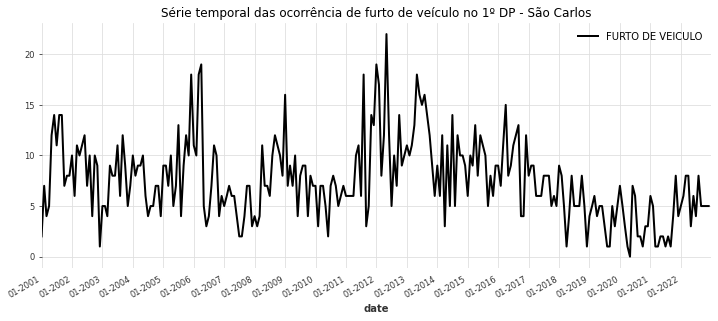

In [13]:
import matplotlib.dates as mdates

#Plotar serie temporal
fig, ax = plt.subplots(figsize=(12, 5))
ts.plot(label='FURTO DE VEICULO')
ax.set_title('Série temporal das ocorrência de furto de veículo no 1º DP - São Carlos')
ax.set_xlim([datetime.datetime(2001, 1, 1), datetime.datetime(2022, 12, 31)])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.gcf().autofmt_xdate()

In [14]:
df3 = df2.copy()
df3 = df3.set_index('date')
df3

,FURTO DE VEÍCULO
date,
2001-01-01,2
2001-02-01,7
2001-03-01,4
2001-04-01,5
2001-05-01,12
...,...
2022-08-01,8
2022-09-01,5
2022-10-01,5


## Diagnósticos

In [15]:
# Verificar sazonalidade, pelo ACF

for m in range(2, 25):
    is_seasonal, mseas = check_seasonality(ts, m=m, alpha=ALPHA)
    if is_seasonal:
        print(m)
        break

print("É sazonal? " + str(is_seasonal))
if is_seasonal:
    print(f'Sazonalidade de ordem {mseas}.')

9
É sazonal? True
Sazonalidade de ordem 9.


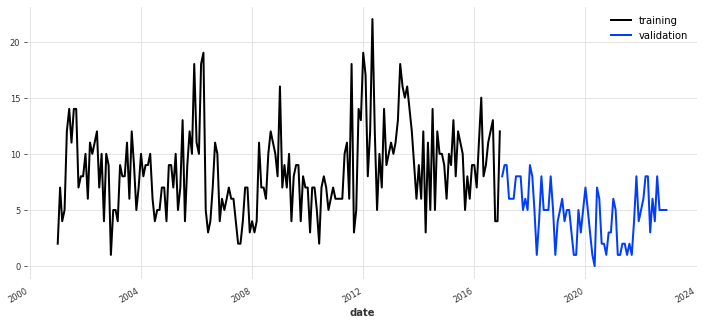

In [16]:
## Dividir dados em treino e teste

if isinstance(TRAIN, numbers.Number):
    split_at = TRAIN
else:
    split_at = pd.Timestamp(TRAIN)
train, val = ts.split_before(split_at)

plt.figure(101, figsize=(12, 5))
train.plot(label='training')
val.plot(label='validation')
plt.legend()

## Previsões

### ARIMA

In [19]:
def ADF_pmd(x):
    adf_test = pmd.arima.stationarity.ADFTest(alpha=ALPHA)
    res = adf_test.should_diff(x)
    conclusion = "Nao-estacionario" if res[0] > ALPHA else "Estacionario"
    resdict = {"Deve diferenciar?":res[1], "p-valor":res[0], "Conclusao":conclusion}
    return resdict

#Teste ADF
#Hipótese nula ADF: série é nao estacionaria 
resADF = ADF_pmd(df2["FURTO DE VEÍCULO"])

print("Teste ADF para os dados originais:")
[print(key, ":", value) for key,value in resADF.items()]

Teste ADF para os dados originais:
Deve diferenciar? : False
p-valor : 0.01941988942662741
Conclusao : Estacionario


[None, None, None]

In [20]:
#Teste KPSS test
# Hipótese nula KPSS: a serie é estacionaria 
def KPSS_pmd(x):
    kpss_test = pmd.arima.stationarity.KPSSTest(alpha=ALPHA)
    res = kpss_test.should_diff(x)
    conclusion = "Nao-estacionario" if res[0] <= ALPHA else "Estacionario"
    resdict = {"Deve diferenciar? ": res[1], "p-value ": res[0], "Conclusao": conclusion}
    return resdict

# call the KPSS test:
resKPSS = KPSS_pmd(df2["FURTO DE VEÍCULO"])

# print test result dictionary:
print("Teste KPSS para os dados originais:")
[print(key, ":", value) for key,value in resKPSS.items()]

Teste KPSS para os dados originais:
Deve diferenciar?  : True
p-value  : 0.01
Conclusao : Nao-estacionario


[None, None, None]

In [21]:
test_values = zip(resADF.values(), resKPSS.values())
dict_tests = dict(zip(resADF.keys(), test_values))
df_tests = pd.DataFrame().from_dict(dict_tests).transpose()
df_tests.columns = ["ADF", "KPSS"]
print("Testes de estacionariedade para os dados originais:")
df_tests

Testes de estacionariedade para os dados originais:


,ADF,KPSS
Deve diferenciar?,False,True
p-valor,0.01942,0.01
Conclusao,Estacionario,Nao-estacionario


In [25]:
n_adf = pmd.arima.ndiffs(df2["FURTO DE VEÍCULO"], test="adf")
n_kpss = pmd.arima.ndiffs(df2["FURTO DE VEÍCULO"], test="kpss")
n_diffs = {"ADF ndiff":n_adf, "KPSS ndiff":n_kpss}
print("recommended order of first differencing for original data:")
[print(key, ":", value) for key,value in n_diffs.items()]

recommended order of first differencing for original data:
ADF ndiff : 0
KPSS ndiff : 1


[None, None]

In [26]:
# Decomposicao da serie temporal

from turtle import title
from statsmodels.stats.stattools import durbin_watson

def plot_stationarity(y, lags):
    y = pd.Series(y)

    # decompoe a serie temporal em tendencia e sazonalidade
    decomp = sm.tsa.seasonal_decompose(y)
    trend = decomp.trend
    seas = decomp.seasonal
   
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(18)
    

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax5 = plt.subplot2grid((3, 3), (2, 0))
    ax6 = plt.subplot2grid((3, 3), (2, 1))

    y.plot(ax=ax1)
    ax1.set_title("Furto de veículo")

    trend.plot(ax=ax2)
    ax2.set_title("Componente de tendência")

    seas.plot(ax=ax3)
    ax3.set_title("Componente sazonal")
    
    plot_acf(y, lags=lags, zero=False, ax=ax5, title='Autocorrelação')
    plot_pacf(y, lags=lags, zero=False, ax=ax6, title='Autocorrelação Parcial')

    plt.tight_layout()

c:\Users\lucas\miniconda3\envs\tcc\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


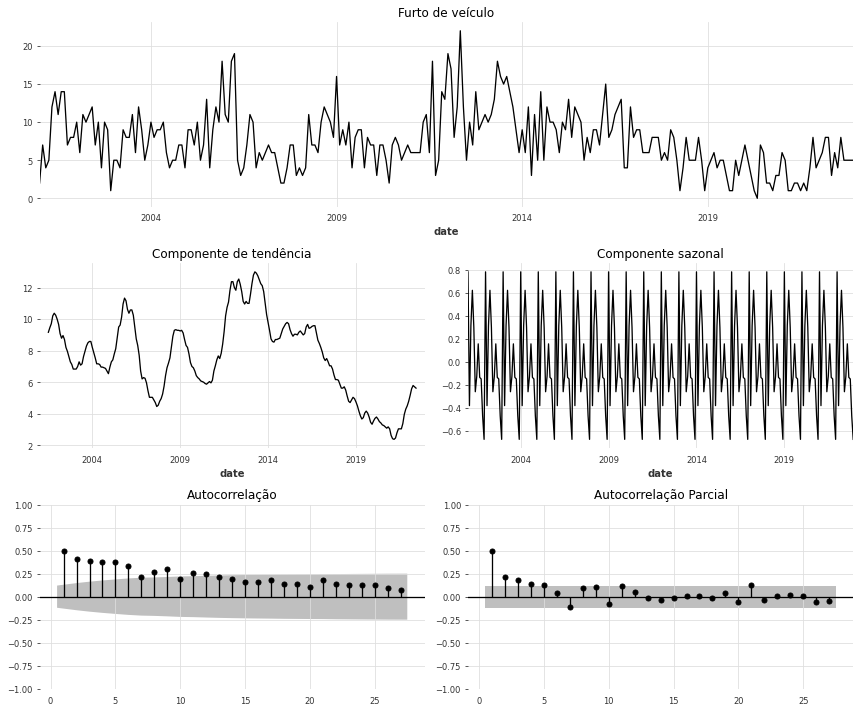

In [27]:
plot_stationarity(df3["FURTO DE VEÍCULO"], 27)

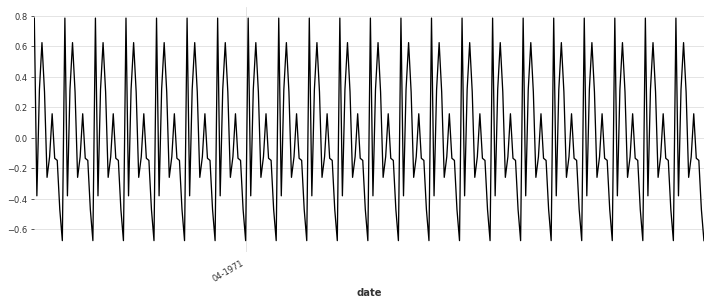

In [28]:
fig, ax = plt.subplots(figsize=(12, 5))
result = sm.tsa.seasonal_decompose(df3['FURTO DE VEÍCULO'], model='additive')
seas = result.seasonal
seas.plot()
# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()

In [29]:
# Testes ADF and KPSS depois da diferenciacao
n_diff = max(n_adf, n_kpss)   
df_diff1 = df3["FURTO DE VEÍCULO"].diff(n_diff).dropna()

resADF = ADF_pmd(df_diff1)
resKPSS = KPSS_pmd(df_diff1)
test_values = zip(resADF.values(), resKPSS.values())
dict_tests = dict(zip(resADF.keys(), test_values))
df_tests = pd.DataFrame().from_dict(dict_tests).transpose()
df_tests.columns = ["ADF", "KPSS"]

print("Stationary after 1 round of first-differencing?")
df_tests

Stationary after 1 round of first-differencing?


,ADF,KPSS
Deve diferenciar?,False,False
p-valor,0.01,0.1
Conclusao,Estacionario,Estacionario


c:\Users\lucas\miniconda3\envs\tcc\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


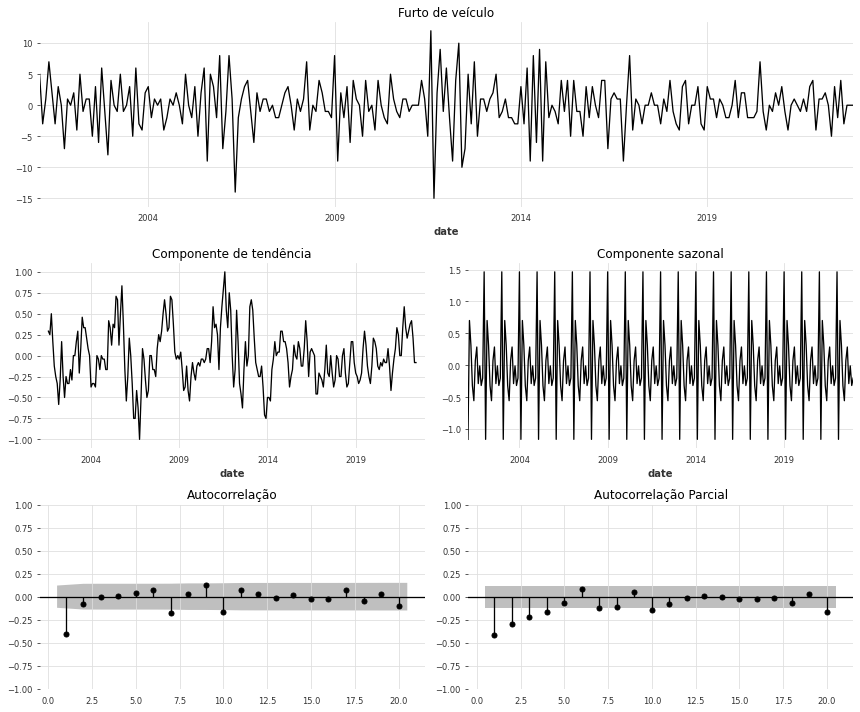

In [30]:
plot_stationarity(df_diff1, 20)

In [31]:
#Preparar o modelo ARIMA

y = np.asarray(ts.pd_series())

#Obtem ordem de diferenciacao
n_kpss = pmd.arima.ndiffs(y, alpha=ALPHA, test='kpss', max_d=2)
n_adf = pmd.arima.ndiffs(y, alpha=ALPHA, test='adf', max_d=2)
n_diff = max(n_adf, n_kpss)

#Obtem ordem de diferenciacao sazonal
n_ocsb = pmd.arima.OCSBTest(m=max(10,mseas)).estimate_seasonal_differencing_term(y)
n_ch = pmd.arima.CHTest(m=max(10,mseas)).estimate_seasonal_differencing_term(y)
ns_diff = max(n_ocsb, n_ch, is_seasonal * 1)

#Configura o modelo ARIMA
m_arima = AutoARIMA(
    start_p=1, d=n_diff, start_q=1,
    max_p=10, max_d=n_diff, max_q=10,
    start_P=0, D=ns_diff, start_Q=0, m=max(10,mseas), seasonal=is_seasonal,
    max_P=9, max_D=1, max_Q=9,
    stationary=False, 
    information_criterion="bic", alpha=ALPHA, 
    test="kpss", seasonal_test="ocsb", trace=True)

## Prophet

In [32]:
#Prepara o modelo Prophet
m_prophet = Prophet(
    changepoint_prior_scale=0.8)
m_prophet.add_seasonality(name='monthly', seasonal_periods=9, fourier_order=5)


In [33]:
## Obter metricas relacionadas aos modelos
def eval_model(model):
    t_start =  time.perf_counter()
    print("beginning: " + str(model))

    #Ajusta o modelo e faz predicoes
    res = model.fit(train)
    forecast = model.predict(len(val))

    #Calcula metricas e tempo de treinamento
    res_r2 = r2_score(val, forecast)
    res_rmse = rmse(val, forecast)
    res_mse = mse(val, forecast)
    res_mae = mae(val, forecast)
    res_time = time.perf_counter() - t_start
    res_accuracy = {"R squared":-res_r2, "RMSE":res_rmse, "MSE":res_mse, "MAE":res_mae, "time":res_time}

    results = [forecast, res_accuracy]
    print("completed: " + str(model) + ":" + str(res_time) + "sec")
    return results

In [34]:
#lista de modelos
models = [ 
    m_arima,
    m_prophet]

In [35]:
# executa os modelos com os parametros determinados
model_predictions = [eval_model(model) for model in models]

beginning: Auto-ARIMA
Performing stepwise search to minimize bic
 ARIMA(1,1,1)(0,1,0)[10]             : BIC=1136.099, Time=0.10 sec
 ARIMA(0,1,0)(0,1,0)[10]             : BIC=1202.447, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[10]             : BIC=1115.748, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[10]             : BIC=inf, Time=0.30 sec
 ARIMA(1,1,0)(0,1,0)[10]             : BIC=1161.568, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[10]             : BIC=1090.820, Time=0.20 sec
 ARIMA(1,1,0)(3,1,0)[10]             : BIC=1081.380, Time=0.38 sec
 ARIMA(1,1,0)(4,1,0)[10]             : BIC=1080.165, Time=0.59 sec
 ARIMA(1,1,0)(5,1,0)[10]             : BIC=1082.795, Time=1.06 sec
 ARIMA(1,1,0)(4,1,1)[10]             : BIC=inf, Time=4.91 sec
 ARIMA(1,1,0)(3,1,1)[10]             : BIC=inf, Time=2.89 sec
 ARIMA(1,1,0)(5,1,1)[10]             : BIC=inf, Time=7.79 sec
 ARIMA(0,1,0)(4,1,0)[10]             : BIC=1111.458, Time=0.69 sec
 ARIMA(2,1,0)(4,1,0)[10]             : BIC=1070.552, Time=1.11 sec
 ARIMA(2,1,0)(3,1

2022-11-08 21:00:41 cmdstanpy DEBUG: cmd: where.exe tbb.dll
cwd: None


completed: Auto-ARIMA:197.60393020000015sec
beginning: Prophet


2022-11-08 21:00:41 cmdstanpy DEBUG: Adding TBB (c:\Users\lucas\miniconda3\envs\tcc\lib\site-packages\prophet\stan_model\cmdstan-2.26.1\stan\lib\stan_math\lib\tbb) to PATH
2022-11-08 21:00:41 prophet INFO: Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
2022-11-08 21:00:41 prophet INFO: Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
2022-11-08 21:00:41 cmdstanpy DEBUG: input tempfile: C:\Users\lucas\AppData\Local\Temp\tmp2q5pu6ec\9eiyy22j.json
2022-11-08 21:00:41 cmdstanpy DEBUG: input tempfile: C:\Users\lucas\AppData\Local\Temp\tmp2q5pu6ec\9p74j66p.json
2022-11-08 21:00:41 cmdstanpy DEBUG: idx 0
2022-11-08 21:00:41 cmdstanpy DEBUG: running CmdStan, num_threads: None
2022-11-08 21:00:41 cmdstanpy DEBUG: CmdStan args: ['c:\\Users\\lucas\\miniconda3\\envs\\tcc\\lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=90117', 'data', 'file=C:\\Users\\lucas\\AppData\\Local\\Temp\\tmp2q5pu6e

completed: Prophet:2.2563491000000795sec


### Acurácia dos modelos

In [36]:
#representa as metricas dos dois modelos

df_acc = pd.DataFrame.from_dict(model_predictions[0][1], orient="index")
df_acc.columns = [str(models[0])]

for i, m in enumerate(models):
    if i > 0: 
        df = pd.DataFrame.from_dict(model_predictions[i][1], orient="index")
        df.columns = [str(m)]
        df_acc = pd.concat([df_acc, df], axis=1)
    i+=1

pd.set_option("display.precision",3)
df_acc.style.highlight_min(color="green", axis=1).highlight_max(color="red", axis=1)

,Auto-ARIMA,Prophet
R squared,0.712,0.872
RMSE,3.155,3.298
MSE,9.952,10.877
MAE,2.520,2.639
time,197.604,2.256


2022-11-08 21:01:24 matplotlib.legend WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2022-11-08 21:01:24 matplotlib.legend WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


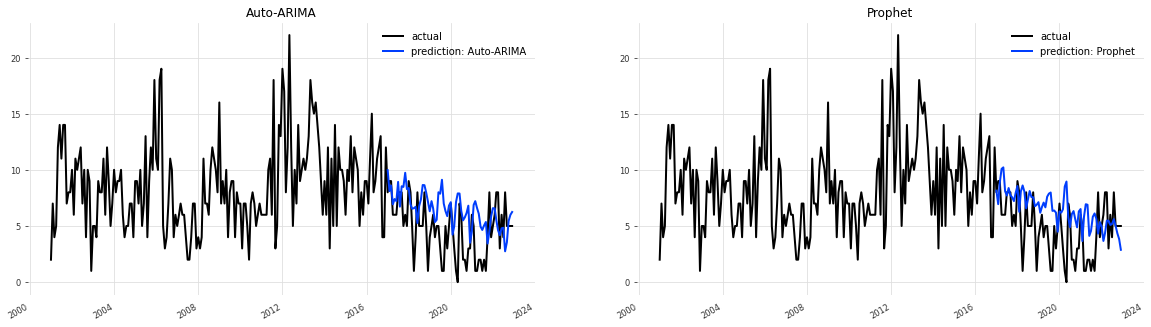

In [37]:
# Plota as previsoes
pairs = math.ceil(len(models)/2)
fig, ax = plt.subplots(pairs, 2, figsize=(20, 5 * pairs))
ax = ax.ravel()

for i,m in enumerate(models):
        ts.plot(label="actual", ax=ax[i])
        model_predictions[i][0].plot(label="prediction: " + str(m), ax=ax[i])
        
        rmse_model =  model_predictions[i][1]["RMSE"]
        time_model =  model_predictions[i][1]["time"]
        ax[i].set_title(str(m))

        ax[i].set_xlabel("")
        ax[i].legend()

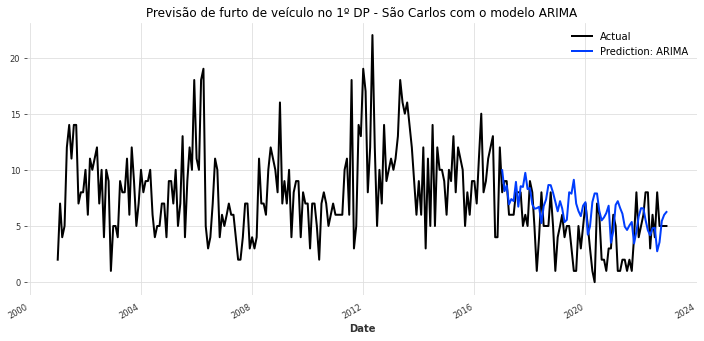

In [38]:
#Plot ARIMA
fig, ax = plt.subplots(figsize=(12, 5))
ts.plot(label="Actual")
model_predictions[0][0].plot(label="Prediction: ARIMA")

rmse_model =  model_predictions[0][1]["RMSE"]
time_model =  model_predictions[0][1]["time"]

#ax.set_title("\n\n" + str(m) + ": RMSE=".format(rmse_model) + " - time {:.2f}sec".format(time_model))
#ax.set_title(f'ARIMA: RMSE={rmse_model:.4} - Time: 1.30s')
ax.set_title('Previsão de furto de veículo no 1º DP - São Carlos com o modelo ARIMA')

ax.set_xlabel("Date")
ax.legend()

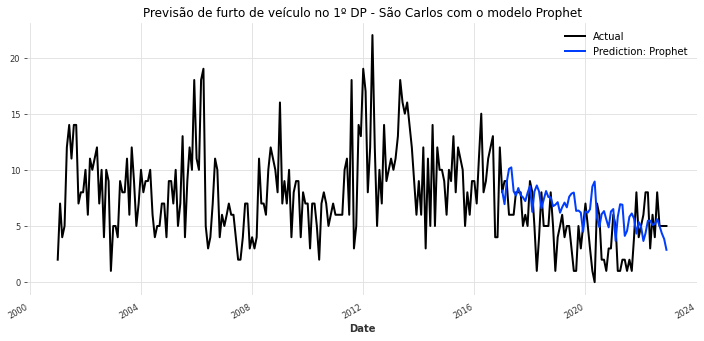

In [39]:
#Plot Prophet
fig, ax = plt.subplots(figsize=(12, 5))
ts.plot(label="Actual")
model_predictions[1][0].plot(label="Prediction: Prophet")

rmse_model =  model_predictions[1][1]["RMSE"]
time_model =  model_predictions[1][1]["time"]

#ax.set_title("\n\n" + str(m) + ": RMSE=".format(rmse_model) + " - time {:.2f}sec".format(time_model))
#ax.set_title(f'ARIMA: RMSE={rmse_model:.4} - Time: {time_model:.3}s')
ax.set_title('Previsão de furto de veículo no 1º DP - São Carlos com o modelo Prophet')

ax.set_xlabel("Date")
ax.legend()

### Diagnóstico de resíduos

In [40]:
act = val

resL = {}
for i,m in enumerate(models):
        pred = model_predictions[i][0]
        resid = pred - act
        sr = resid.pd_series() 

        resL[str(m)] = sm.stats.acorr_ljungbox(sr, lags=[5], return_df=False)[1][0]

        
print("\nLjung-Box test for white-noise residuals: p-value > alpha?")
[print(key,":",value) for key,value in resL.items()]


Ljung-Box test for white-noise residuals: p-value > alpha?
Auto-ARIMA : 8.12264026319789e-05
Prophet : 0.0020666083845339894


[None, None]

O teste Ljung-Box investiga se os resíduos representam ruído branco. Os baixos p-valores (<0.05), sugerem que os modelos não representam ruídos brancos, o que implica que todos os modelos falharam em identificar alguns sinais que poderiam ser utilizados para melhorar a acurácia da previsão

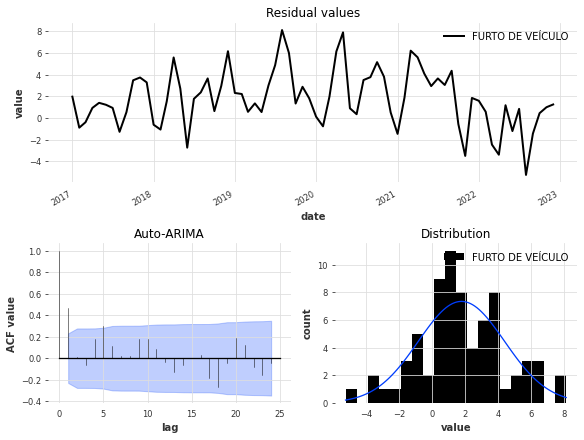

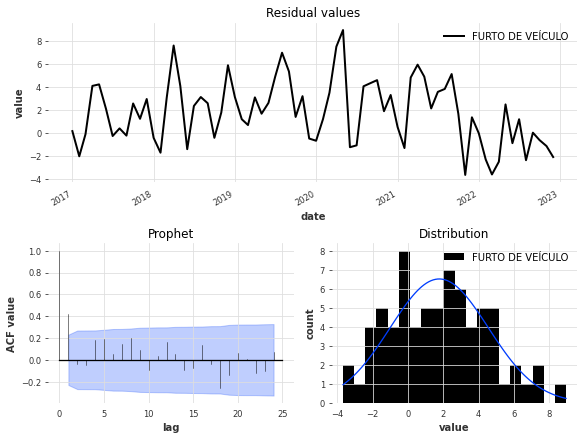

In [41]:
# investigate the residuals in the validation dataset

act = val
df_desc = pd.DataFrame()

for i,m in enumerate(models):
        pred = model_predictions[i][0]
        resid = pred - act

        #df_desc = pd.concat([df_desc, resid.describe()], axis=1)

        plot_residuals_analysis(resid)
        plt.title(str(m))